# Holiday Package Prediction

# Dataset

Perusahaan **"Trips&Travel.com"** ingin mengaktifkan dan membangun model bisnis yang layak untuk memperluas basis pelanggan. Salah satu cara untuk memperluas basis pelanggan adalah dengan memperkenalkan penawaran paket baru. Saat ini, ada 5 jenis paket yang ditawarkan perusahaan yaitu **Basic, Standard, Deluxe, Super Deluxe, King**. Melihat data tahun lalu, kami mengamati bahwa **18% pelanggan membeli paket**. Namun, **biaya pemasarannya cukup tinggi karena pelanggan dihubungi secara acak** tanpa melihat informasi yang tersedia. Saat ini perusahaan berencana untuk meluncurkan produk baru yaitu Paket Wisata Kesehatan. **Wellness Tourism** didefinisikan sebagai perjalanan yang memungkinkan wisatawan untuk mempertahankan, meningkatkan atau memulai gaya hidup sehat, dan mendukung atau meningkatkan rasa sejahtera seseorang. Namun, saat ini perusahaan ingin memanfaatkan data yang tersedia dari pelanggan yang ada dan pelanggan potensial untuk membuat pengeluaran pemasaran lebih efisien.

# Stage 0 Businees Understanding

## Role

Kami adalah tim data scientist internal perusahaan **"Trips&Travel.Com"**, yang merupakan bagian dari divisi marketing. Kami bertanggung jawab menganalisa dan memberikan rekomendasi kepada bagian marketing sehingga dapat meningkatkan kinerja bagian tersebut guna memberikan impact signifikan kepada perusahaan.

## Problem

- Berdasarkan data tahun lalu diketahui bahwa 18% pelanggan membeli paket liburan. Namun, biaya pemasarannya cukup tinggi karena pelanggan dihubungi secara acak tanpa melihat informasi yang tersedia.
- Perusahaan ingin meluncurkan paket liburan baru, tetapi perusahaan ingin memanfaatkan data yang tersedia dari pelanggan yang ada dan pelanggan potensial untuk membuat pengeluaran pemasaran lebih efisien.

## Goal

- Memprediksi pelanggan yang akan membeli paket liburan agar biaya pemasaran menjadi lebih efisien.

## Objective

- Membuat model machine learning yang mampu memprediksi pelanggan yang akan terkonversi membeli paket liburan secara otomatis sehingga biaya pemasaran bisa ditargetkan untuk pelanggan terkonversi itu saja.

## Business Metric

- **Conversion Rate** : Persentase banyaknya pelanggan yang akan membeli paket liburan.
- **Revenue** : Pendapatan yang agar dihasilkan dari pembelian paket liburan untuk menutupi pengeluaran pemasaran.
- **Marketing Cost** : Biaya pemasaran yang dibutuhkan selama pemasaran produk.

# Stage 1 Exploratory Data Analysis

# Data Collection

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
# read file csv into dataframe
df = pd.read_csv('Travel.csv')

# view info attributes and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Dari info data tersebut diketahui bahwa:
- Data terdiri dari 4888 baris dan 20 kolom (14 kolom numerik dan 6 kolom kategorik).
- Tampak beberapa kolom yang memiliki nilai null/missing values (non-null count < total baris).
- Penamaan kolom dan tipe data terlihat sudah sesuai.

## Data Description

- **CustomerID** : Unique customer ID
- **ProdTaken** : Product taken or not (0: No, 1: Yes)
- **Age** : Age of customer
- **TypeofContact** : How customer was contacted (Company Invited or Self Inquiry)
- **CityTier** : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
- **DurationOfPitch** : Duration of the pitch by a salesperson to the customer
- **Occupation** : Occupation of customer
- **Gender** : Gender of customer
- **NumberOfPersonVisiting** : Total number of persons planning to take the trip with the customer
- **NumberOfFollowups** : Total number of follow-ups has been done by the salesperson after the sales pitch
- **ProductPitched** : Product pitched by the salesperson
- **PreferredPropertyStar** : Preferred hotel property rating by customer
- **MaritalStatus** : Marital status of customer
- **NumberOfTrips** : Average number of trips in a year by customer
- **Passport** : The customer has a passport or not (0: No, 1: Yes)
- **PitchSatisfactionScore** : Sales pitch satisfaction score
- **OwnCar** : Whether the customers own a car or not (0: No, 1: Yes)
- **NumberOfChildrenVisiting** : Total number of children with age less than 5 planning to take the trip with the customer
- **Designation** : Designation of the customer in the current organization
- **MonthlyIncome** : Gross monthly income of the customer

# Data Understanding

In [3]:
# view 5 rows sample of data
df.sample(5, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3476,203476,1,40.0,Company Invited,1,9.0,Salaried,Female,3,5.0,Basic,5.0,Unmarried,4.0,1,3,0,1.0,Executive,22324.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
159,200159,0,34.0,Company Invited,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,7.0,0,5,1,2.0,Executive,17231.0
2477,202477,1,40.0,Self Enquiry,3,12.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,20764.0
291,200291,0,36.0,Self Enquiry,1,NaN,Large Business,Male,1,3.0,Deluxe,4.0,Single,5.0,0,2,1,0.0,Manager,19485.0


Berdasarkan sampel 5 data tersebut diketahui bahwa:
- Isi dari kolom `Gender` terdapat kesalahan penulisan **Fe Male** yang seharusnya adalah **Female**.
- Isi dari kolom `MaritalStatus` terdapat status pernikahan berisi **Single** bisa bermakna sama dengan **Unmarried**.
- Untuk kolom-kolom lainnya sudah sesuai isinya.

## Descriptive Statistics

In [4]:
# statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


Dari statistik kolom numerik dapat disimpulkan bahwa:
- Terdapat kolom dengan nilai null/kosong karena jumlah count < total baris yaitu `Age`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan, `MonthlyIncome`.
- Terdapat outlier pada kolom `DurationOfPitch` dan `NumberOfTrips` karena memiliki nilai max yang sangat jauh dari nilai Q3.
- Terdapat outlier pada kolom `MonthlyIncome` memiliki nilai mean yang cukup lebih tinggi dari nilai median.
- Untuk kolom-kolom lainnya kemungkinan mendekati distribusi normal terutama kolom `Age`.

In [5]:
# statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


Dari statistik kolom kategorik dapat disimpulkan bahwa:
- Terdapat kolom dengan nilai null/kosong karena jumlah count < total baris yaitu `TypeofContact`.
- Terdapat kolom yang memiliki proporsi lebih dari 50% jumlah baris datanya, yaitu *Self Enquiry*  pada kolom `TypeofContact` dan *Male*  pada kolom `Gender`. Untuk proporsi dari kategori setiap kolom lebih jelasnya dapat dilihat dibawah ini.

In [6]:
# proportion of count data on categorical columns
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
---------------------------
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
---------------------------
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
---------------------------
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
---------------------------
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
---------------------------
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64
---------------------------


In [7]:
# check duplicate rows
print('Apakah terdapat baris yang duplikat ?', df.drop('CustomerID', axis=1).duplicated().any())
duplicate_rows = df.drop('CustomerID', axis=1).duplicated().sum()
print('Dari keseluruhan data telah ditemukan data duplikat sebanyak {} baris'.format(duplicate_rows))

Apakah terdapat baris yang duplikat ? True
Dari keseluruhan data telah ditemukan data duplikat sebanyak 141 baris


## Univariate Analysis

In [8]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical columns : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


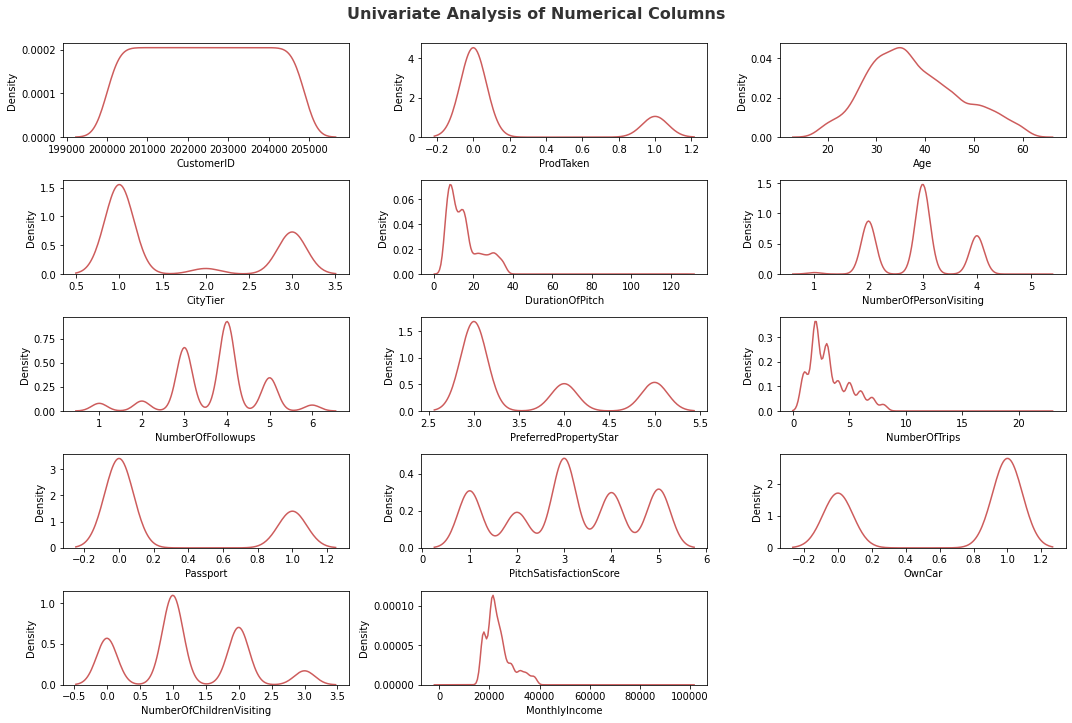

In [9]:
# numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
    
# save plot
plt.savefig('fig/univariate_analysis_num.png')

Dari hasil visualisasi tersebut dapat disimpulkan bahwa:
- Kolom `CustomerID` memiliki sebaran data yang terlalu banyak, mungkin dikarenakan pelanggan tiap baris selalu unik sehingga kolom tersebut bisa dihapus nantinya.
- Kolom `Age` sepertinya mendekati distribusi normal.
- Kolom `DurationOfPitch`, `NumberOfTrips`, dan `MonthlyIncome` sepertinya memiliki distribusi data **positive skewed** (menceng ke kanan) yang mengindikasikan terdapat outlier.
- Untuk kolom lain bisa diabaikan karena sejatinya termasuk jenis data diskrit atau ordinal.

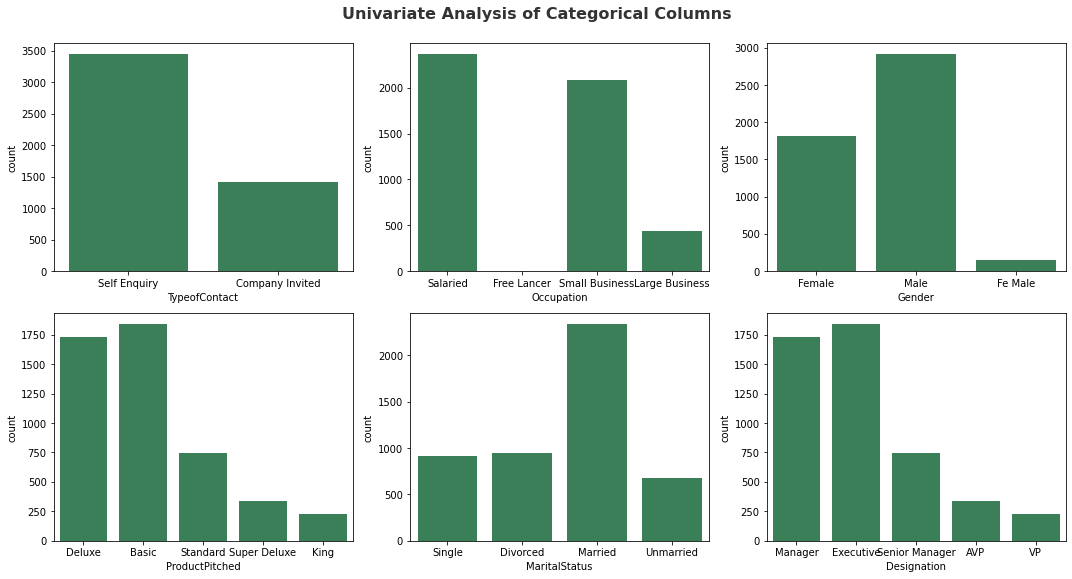

In [10]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='seagreen')
    plt.tight_layout()
    
# save plot
plt.savefig('fig/univariate_analysis_cat.png')

Dari hasil visualisasi diatas dapat disimpulkan bahwa:
- Pada kolom `TypeofContact` didominasi (proporsi data lebih dari 50%) oleh Self Enquiry.
- Pada kolom `Occupation` didominasi Salaried dan Small Business, namun jumlah Free Lancer terlalu sedikit jadi bisa dihapus nantinya.
- Pada kolom `Gender` jenis kelamin laki-laki lebih banyak dibandingkan perempuan. Selain itu terdapat kesalahan penulisan kategori Fe Male yang seharusnya Female.
- Pada kolom `ProductPitched` dan `Designation` didominasi 2 kategori.
- Pada kolom `MaritalStatus` didominasi oleh status Married. Lalu status Single dan Unmarried bisa diartikan sama sehingga bisa digabungkan.

## Multivariate Analysis

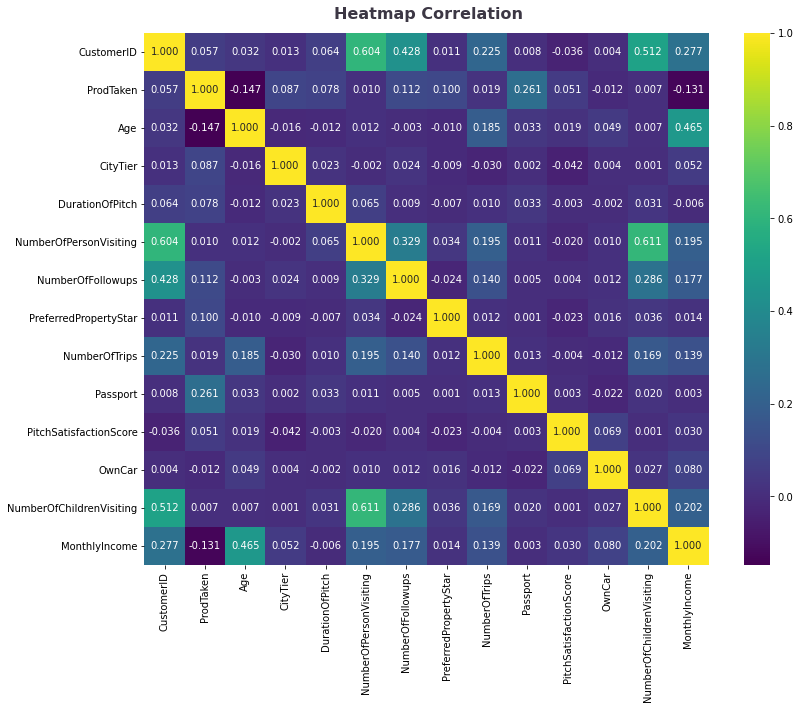

In [11]:
# Heatmap Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='viridis')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('fig/heatmap.png')

Dari hasil korelasi tersebut diketahui bahwa:
- Kolom target kita `ProdTaken` memiliki korelasi negatif lemah pada `Age` dan `MontlyIncome`.
- Kolom `NumberOfFollowups` dan `Passport` juga memiliki korelasi positif lemah terhadap `ProdTaken`.
- Kolom `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` memiliki korelasi positif cukup kuat sehingga bisa digabung menjadi fitur kolom baru.

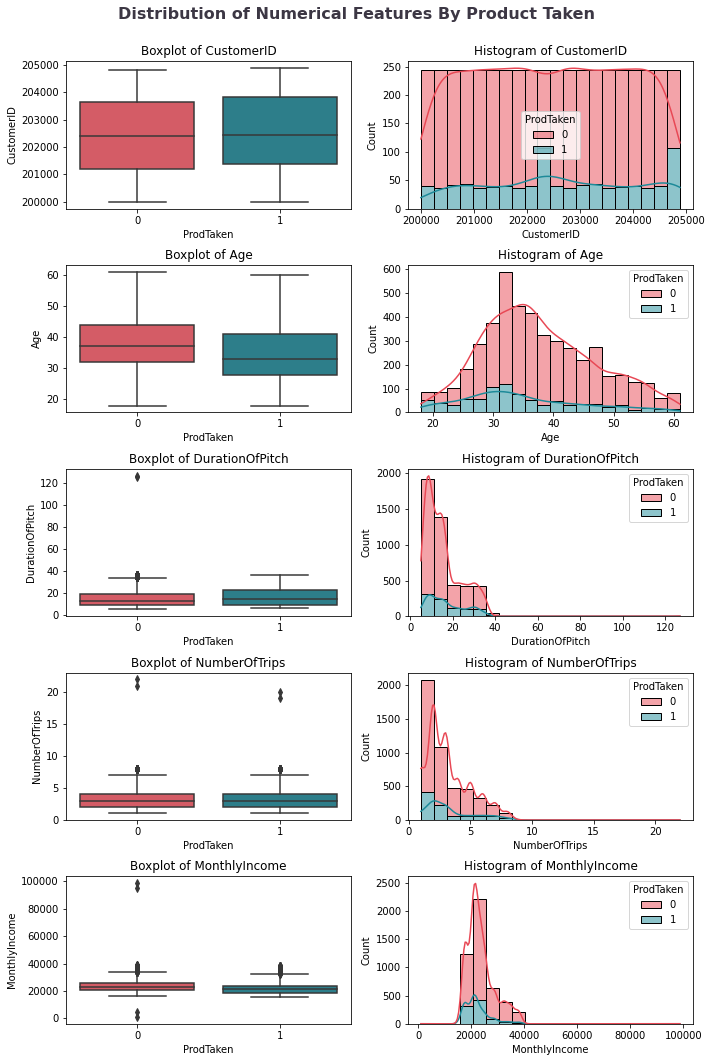

In [12]:
# EDA Numerical Features by Target
num_cols2 = ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='ProdTaken', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('fig/multivariate_analysis_num.png')

Dari hasil visualisasi tersebut dapat disimpulkan bahwa:
- Pada kolom `CustomerID` karena datanya memiliki nilai unik tiap baris maka bisa diabaikan sebagai fitur.
- Customer yang membeli paket perjalanan kebanyakan berumur 20-35.
- Durasi Pitch yang dilakukan sales dibawah 20 menit memungkinkan customer untuk membeli paket perjalanan.
- Jumlah perjalanan yang pernah diambil customer kebanyakan tidak lebih 5 selama setahun.
- Customer dengan pendapatan bulanan berkisar 150000-250000 kemungkinan lebih tertarik membeli paket perjalanan.

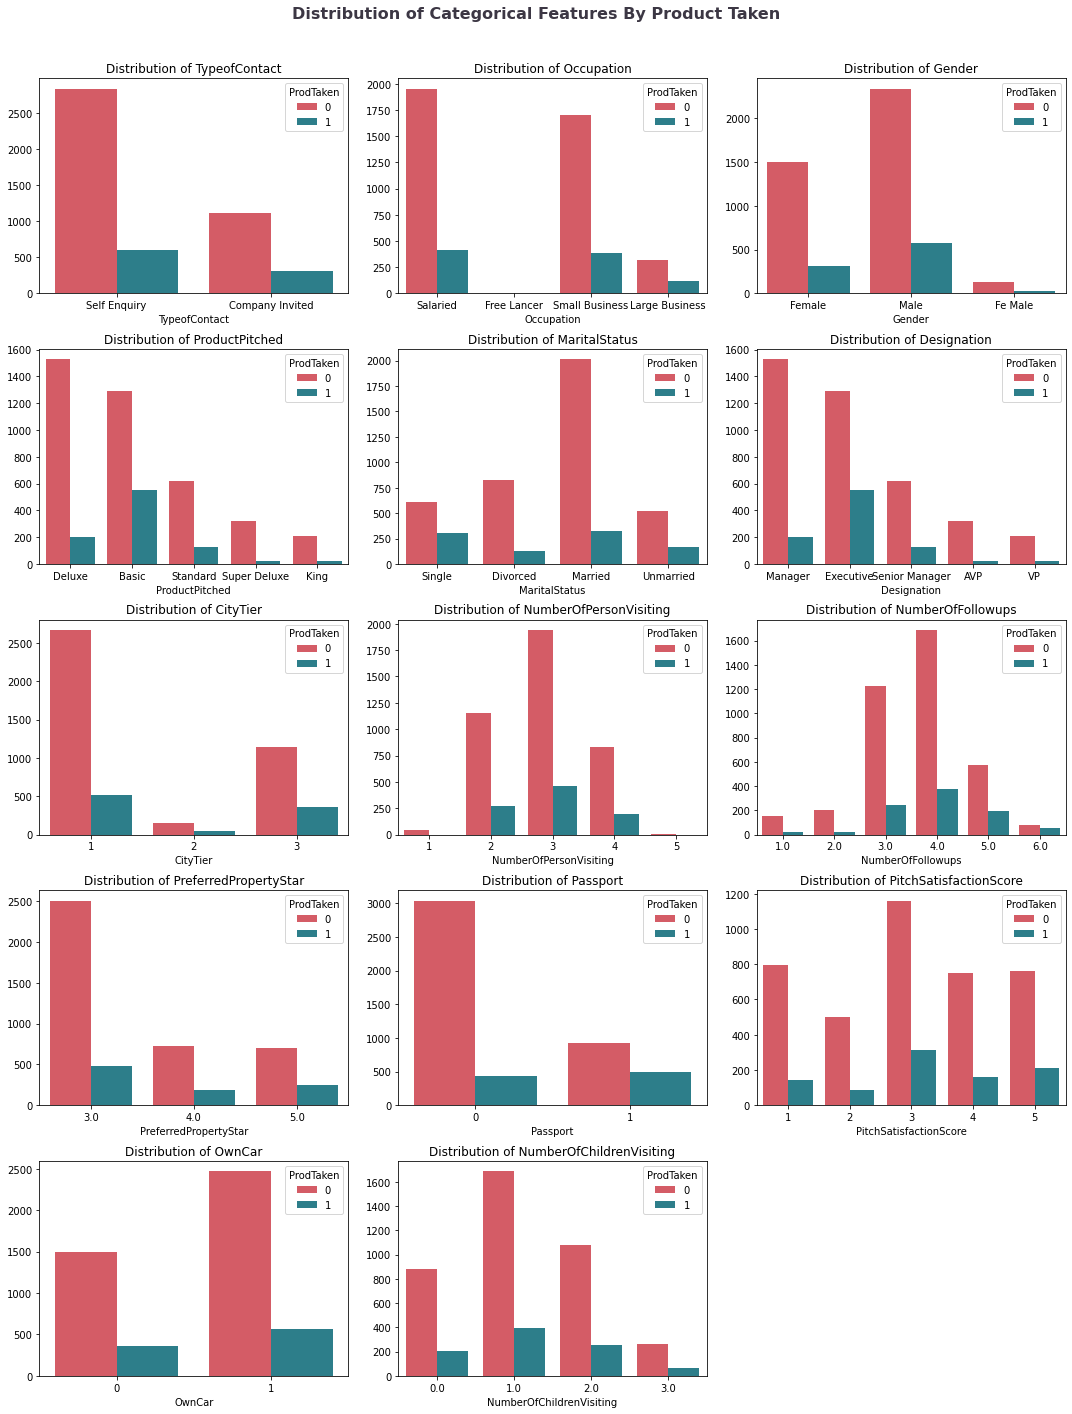

In [13]:
# EDA Categorical Features by Target
cat_cols2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
clr2 = ['#E84855', '#1D8A99']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='ProdTaken', palette=clr2, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('fig/multivariate_analysis_cat.png')

Dari hasil visualisasi diatas dapat disimpulkan bahwa:
- Customer dengan tipe kontak Self Enquiry lebih tinggi untuk membeli paket perjalanan dibandingkan Company Invited.
- Customer dengan Occupation Salaried dan Small Business lebih tertarik membeli paket perjalanan, dan Free Lancer yang sudah pasti membeli paket perjalanan.
- Customer laki-laki lebih banyak membeli paket perjalanan dibandingkan perempuan.
- Jenis produk Basic yang ditawarkan sales ke customer lebih banyak dibeli.
- Customer yang Married maupun Single atau Unmarried lebih banyak untuk membeli paket perjalanan.
- Paket perjalanan yang ditawarkan kepada customer Executive lebih banyak dibeli.
- Customer yang berada di City Tier 1 dan 3 lebih tertarik membeli paket perjalanan.
- Jumlah orang yang akan bepergian 2-4 lebih banyak membeli paket perjalanan.
- Customer yang difollow up >=3 kali setelah pitching lebih banyak membeli paket perjalanan.
- Customer yang memberikan rating 3 pada properti hotel yang akan digunakan selama liburan lebih banyak membeli paket perjalanan.
- Customer yang memiliki passport sedikit lebih banyak membeli paket perjalanan.
- Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
- Customer yang memiliki mobil lebih banyak membeli paket perjalanan.
- Customer dengan jumlah anak dibawah 5 tahun adalah 0 atau 1 lebih banyak membeli paket perjalanan

In [14]:
# check correlation categorical columns to target
# H0 : Kolom kategorik tersebut tidak berkorelasi dengan target
# H1 : Kolom kategorik tersebut berkorelasi dengan target

from scipy.stats import chi2_contingency
chi2_check = []
for i in cat_cols:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,Gender,Fail to Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis
5,Designation,Reject Null Hypothesis


Dari hasil pengujian tersebut dapat disimpulkan bahwa:
- Kolom `Gender` mungkin tidak akan dimasukkan sebagai fitur karena Fail to Reject Null Hypothesis (artinya kolom tidak berkorelasi dengan target).
- Untuk kolom `TypeofContact`, `Occupation`, `ProductPitched`, `MaritalStatus`, dan `Designation` bisa dimasukkan sebagai fitur karena Reject Null Hypothesis (artinya kolom berkorelasi dengan target).

In [15]:
# check proportion target
prop_target = df['ProdTaken'].value_counts(normalize=True) * 100
print('Persentase customer yang tidak membeli paket perjalanan adalah {}%'.format(round(prop_target[0], 1)))
print('Persentase customer yang membeli paket perjalanan adalah {}%'.format(round(prop_target[1], 1)))

Persentase customer yang tidak membeli paket perjalanan adalah 81.2%
Persentase customer yang membeli paket perjalanan adalah 18.8%


## EDA Conclusion

Dari hasil EDA yang telah dilakukan dapat disimpulkan bahwa :
1. Nama kolom dan tipe data sudah sesuai , tetapi ada kesalahan data pada kolom `Gender` dan kesamaan makna data pada kolom `Marital Status`.
2. Terdapat *missing values* pada kolom `Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact`.
3. Terdapat outlier pada kolom `DurationOfPitch, NumberOfTrips, MonthlyIncome`.
4. Telah ditemukan baris yang duplikat pada dataset yang digunakan.
5. Kolom `CustomerID` bisa dihapus karena setiap baris memiliki customer id yang berbeda-beda.
6. Kolom `ProdTaken` adalah target yang akan diprediksi.
7. Kolom numerik yang terlihat memiliki korelasi terhadap target dapat digunakan sebagai fitur, yaitu `Age`, `MontlyIncome`, `NumberOfFollowups` dan `Passport`.
8. Kolom `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` memiliki korelasi positif cukup kuat sehingga bisa digabung untuk menjadi fitur baru (`TotalVisiting`).
9. Beberapa kolom numerik yang terlihat sama sekali tidak berkorelasi terdapat target dapat dihapus.
10. Pada kolom kategorik bisa dimasukkan fitur, yaitu `TypeofContact`, `Occupation`, `ProductPitched`, `MaritalStatus`, dan `Designation` karena berdasarkan hasil pengujian hypothesis menggunakan chi-square berhasil reject H0 (artinya berkorelasi dengan target).

# Business Insight

In [16]:
# copy dataframe
df2 = df.copy()

## Produk manakah yang membuat pelanggan tertarik membelinya?

In [17]:
df_product = df2.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')
df_product

,ProductPitched,ProdTaken,TotalCust
0,Basic,0,1290
1,Basic,1,552
2,Deluxe,0,1528
3,Deluxe,1,204
4,King,0,210
5,King,1,20
6,Standard,0,618
7,Standard,1,124
8,Super Deluxe,0,322
9,Super Deluxe,1,20


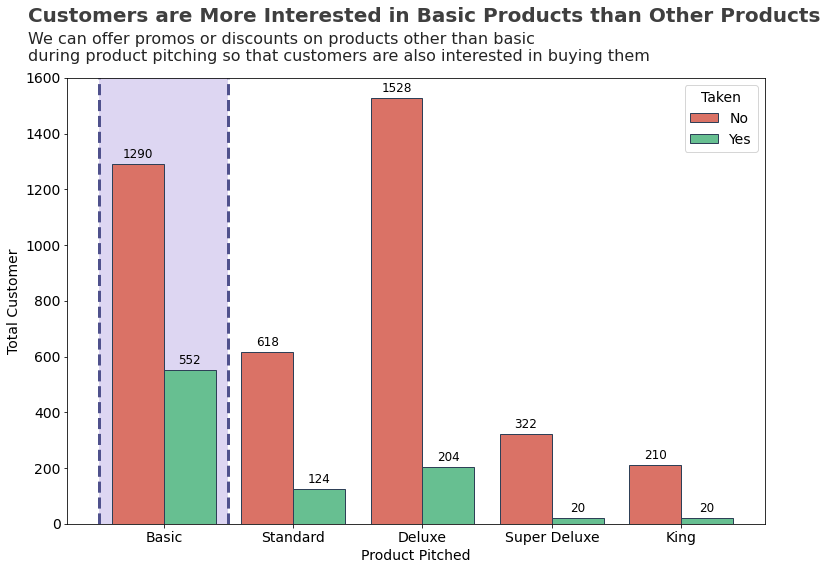

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
ax = sns.barplot(data=df_product, x='ProductPitched', y='TotalCust', hue='ProdTaken',
                 palette=['#EE6352', '#59CD90'], order=product_labs, edgecolor='#2E4057')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Product Pitched', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
plt.ylim(0, 1600)
plt.stackplot(np.arange(-0.5, 1.5 ,1), [[1600]], colors='#907AD6', alpha=0.3)
plt.axvline(x=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#4F518C', linestyle='--', linewidth=3) 

# data_bars = df_product.sort_values('ProdTaken')['TotalCust'].values
# for rec, data in zip(ax.patches, data_bars) :
#     ax.text(rec.get_x() + rec.get_width() / 2,
#             rec.get_y() + rec.get_height(),
#             data, fontsize=14, fontweight='bold',
#             color='#2E4057', alpha=0.8, va='bottom', ha='center')
for container in ax.containers:
    ax.bar_label(container, size=12, padding=3)
    
ax.text(s='Customers are More Interested in Basic Products than Other Products', 
        x=-1.05, y=1800, fontsize=20, fontweight='bold', alpha =.75)
ax.text(s='We can offer promos or discounts on products other than basic\nduring product pitching so that customers are also interested in buying them',
        x=-1.05, y=1660, fontsize=16, alpha =.85)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=14, title_fontsize=14, title='Taken')
plt.tight_layout()
plt.savefig('fig/insight1.png')

## Apakah jumlah follow up dari sales mempengaruhi pelanggan untuk membeli paket perjalanan? 

In [19]:
followup_total = pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken']).stack().reset_index(name='TotalCust')
followup_perc = round(pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken'], normalize='index')*100, 2)
followup_perc = followup_perc.stack().reset_index(name='PercCust')

df_followups = followup_total.merge(followup_perc, on=['NumberOfFollowups', 'ProdTaken'])
df_followups

,NumberOfFollowups,ProdTaken,TotalCust,PercCust
0,1.0,0,156,88.64
1,1.0,1,20,11.36
2,2.0,0,205,89.52
3,2.0,1,24,10.48
4,3.0,0,1222,83.36
5,3.0,1,244,16.64
6,4.0,0,1689,81.67
7,4.0,1,379,18.33
8,5.0,0,577,75.13
9,5.0,1,191,24.87


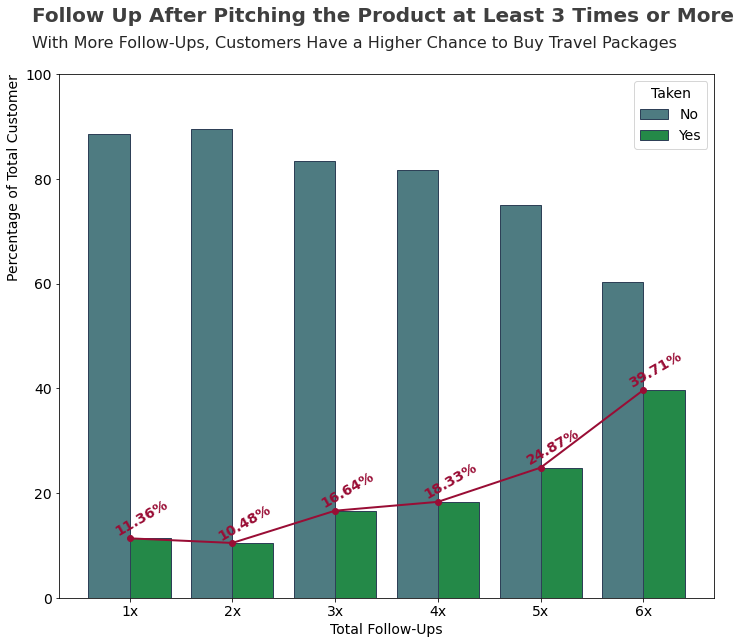

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(11,9))
sns.barplot(data=df_followups, x='NumberOfFollowups', y='PercCust', hue='ProdTaken', 
            ax=ax, palette=['#468189', '#139A43'], edgecolor='#2E4057')
line_p = df_followups[df_followups['ProdTaken']==1]
ax.plot(np.arange(0,6), line_p['PercCust'], color='#990D35', linewidth=2, marker='o')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Total Follow-Ups', fontsize=14)
ax.set_ylabel('Percentage of Total Customer', fontsize=14, loc='top')
ax.set_xticklabels([x.get_text()[0]+'x' for x in ax.get_xticklabels()])
plt.ylim(0, 100)

data_bars = df_followups[df_followups['ProdTaken']==1]['PercCust'].values
for rec, data in zip(ax.containers[1], data_bars) :
    ax.text(rec.get_x() + rec.get_width(),
            rec.get_y() + rec.get_height(),
            '{}%'.format(data), fontsize=14, fontweight='bold',
            color='#990D35', va='bottom', ha='right', rotation=30)
ax.text(s='Follow Up After Pitching the Product at Least 3 Times or More', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75)
ax.text(s='With More Follow-Ups, Customers Have a Higher Chance to Buy Travel Packages',
        x=-0.95, y=105, fontsize=16, alpha =.85)

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=14, title_fontsize=14, title='Taken')
plt.tight_layout()
plt.savefig('fig/insight2.png')

## Kelompok umur manakah yang lebih banyak membeli paket perjalanan? 

Kategori umur menurut **Departemen Kesehatan Republik Indonesia** tahun 2009 yakni sebagai berikut :
- Masa balita usia 0 – 5 tahun
- Masa kanak-kanak usia 5 – 11 tahun
- Masa remaja awal usia 12 – 16 tahun
- Masa remaja akhir usia 17 – 25 tahun
- Masa dewasa awal usia 26 – 35 tahun
- Masa dewasa akhir usia 36 – 45 tahun
- Masa lansia awal usia 46 – 55 tahun
- Masa lansia akhir usia 56 – 65 tahun
- Masa manula usia 65 – ke atas

In [21]:
print('Age data is start from {} to {}'.format(int(df2['Age'].min()), int(df2['Age'].max())))

Age data is start from 18 to 61


Dari kategorisasi tersebut maka kami mengelompokkan data umur menjadi :
- Youth : 18 - 25 tahun
- Adult : 26 - 45 tahun
- Elderly : 46 - 61 tahun

In [22]:
def age_group(x):
    if x>=18 and x<=25:
        return 'Youth'
    elif x<=45:
        return 'Adult'
    else:
        return 'Elderly'
    
df2['AgeGroup'] = df2['Age'].apply(lambda x : age_group(x))
age_group = df2.groupby(['AgeGroup', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')
age_group

,AgeGroup,ProdTaken,TotalCust
0,Adult,0,2752
1,Adult,1,589
2,Elderly,0,1012
3,Elderly,1,188
4,Youth,0,204
5,Youth,1,143


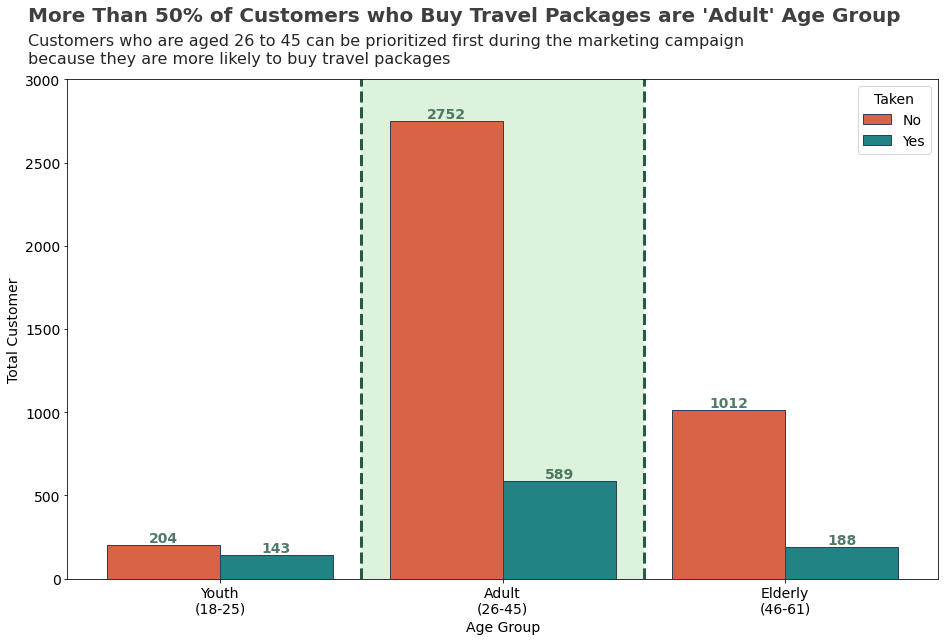

In [23]:
age_order = ['Youth', 'Adult', 'Elderly']
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.barplot(data=age_group, x='AgeGroup', y='TotalCust', hue='ProdTaken',
            order=age_order, palette=['#F2542D', '#0E9594'], edgecolor='#2E4057')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)

label_x = []
for x in age_order:
    minimum = int(df2[df2['AgeGroup']==x]['Age'].min())
    maksimum = int(df2[df2['AgeGroup']==x]['Age'].max())
    label_x.append('('+str(minimum)+'-'+str(maksimum)+')')
ax.set_xticklabels([x.get_text()+'\n'+lab for x, lab in zip(ax.get_xticklabels(), label_x)])
plt.ylim(0, 3000)

plt.stackplot(np.arange(0.5, 2 ,1), [[3000]], colors='#8CD790', alpha=0.3)
plt.axvline(x=0.5, color='#285943', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='#285943', linestyle='--', linewidth=3) 

no = []
yes = []
for g in age_order:
    dfg = age_group[age_group['AgeGroup']==g]
    no.extend(dfg[dfg['ProdTaken']==0]['TotalCust'].values) 
    yes.extend(dfg[dfg['ProdTaken']==1]['TotalCust'].values)
data_bars = no + yes
    
for rec, data in zip(ax.patches, data_bars) :
    ax.text(rec.get_x() + rec.get_width() / 2,
            rec.get_y() + rec.get_height(),
            data, fontsize=14, fontweight='bold',
            color='#285943', alpha=0.8, va='bottom', ha='center')
ax.text(s="More Than 50% of Customers who Buy Travel Packages are 'Adult' Age Group", 
        x=-0.68, y=3350, fontsize=20, fontweight='bold', alpha =.75)
ax.text(s='Customers who are aged 26 to 45 can be prioritized first during the marketing campaign\nbecause they are more likely to buy travel packages',
        x=-0.68, y=3100, fontsize=16, alpha =.85)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=14, title_fontsize=14, title='Taken')
plt.tight_layout()
plt.savefig('fig/insight3.png')

## Apakah semakin lama duration of pitch dari sales mempengaruhi pelanggan untuk membeli paket perjalanan baru? 

In [24]:
df2.drop_duplicates(inplace=True)

In [25]:
_all = df2.groupby('DurationOfPitch')[['ProdTaken']].count()
yes = df2[df2['ProdTaken']==1].groupby('DurationOfPitch')[['ProdTaken']].count()
semua = yes.merge(_all,on='DurationOfPitch',how='left')
semua['%']=round((semua['ProdTaken_x']*100/semua['ProdTaken_y']),2)
semua.reset_index(inplace=True)#
# semua.sort_values(by='%',ascending=False,inplace=True)
semua = semua.head(30)
semua.iloc[13:26]

,DurationOfPitch,ProdTaken_x,ProdTaken_y,%
13,19.0,21,57,36.84
14,20.0,19,65,29.23
15,21.0,16,73,21.92
16,22.0,23,89,25.84
17,23.0,21,79,26.58
18,24.0,16,70,22.86
19,25.0,14,73,19.18
20,26.0,12,72,16.67
21,27.0,14,72,19.44
22,28.0,17,61,27.87


In [26]:
f_all = df2.groupby('NumberOfFollowups')[['ProdTaken']].count()
f_yes = df2[df2['ProdTaken']==1].groupby('NumberOfFollowups')[['ProdTaken']].count()
f_semua = f_yes.merge(f_all,on='NumberOfFollowups',how='left')
f_semua['%']=round((f_semua['ProdTaken_x']*100/f_semua['ProdTaken_y']),2)
f_semua.reset_index(inplace=True)#
f_semua.sort_values(by='%',ascending=False,inplace=True)
f_semua

,NumberOfFollowups,ProdTaken_x,ProdTaken_y,%
5,6.0,54,136,39.71
4,5.0,191,768,24.87
3,4.0,379,2068,18.33
2,3.0,244,1466,16.64
0,1.0,20,176,11.36
1,2.0,24,229,10.48


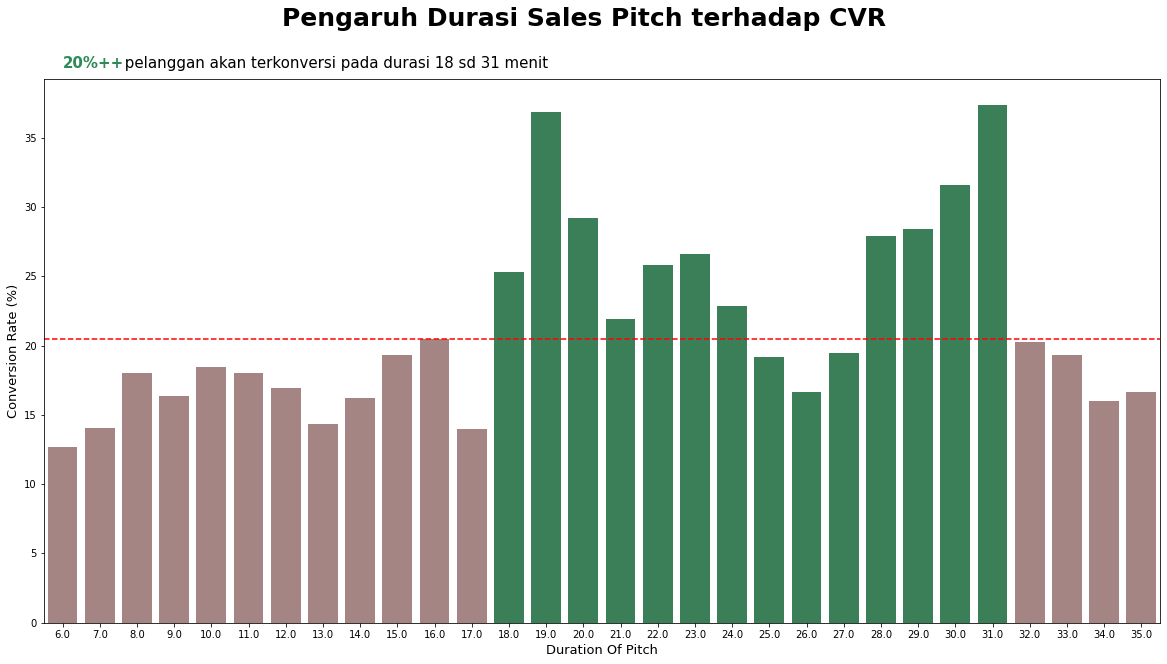

In [27]:
plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
sns.barplot(x='DurationOfPitch',y='%',data=semua,orient='v',order=semua['DurationOfPitch'],color='indianred',saturation=0.3)
sns.barplot(x='DurationOfPitch',y='%',data=semua.iloc[12:26],orient='v',order=semua['DurationOfPitch'],color='seagreen')
plt.ylabel('Conversion Rate (%)',size=13)
plt.xlabel('Duration Of Pitch',size=13)
plt.axhline(20.5, linestyle='dashed',color='r')
plt.suptitle('Pengaruh Durasi Sales Pitch terhadap CVR',size=25,family='sans',weight='bold')
plt.text(0,40,s='             pelanggan akan terkonversi pada durasi 18 sd 31 menit',fontdict=({'size':15,'family':'sans'}))
plt.text(0,40,s='20%++',fontdict=({'size':15,'family':'sans'}),c='seagreen',weight='bold')
plt.savefig('fig/insight4.png')
plt.show()

# Stage 2 Data Preprocessing

## Data Cleansing

In [28]:
# copy dataframe for preprocessing
df_prep = df.copy()

### Handling Inconsistent Data

In [29]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

print('Gender :', df_prep['Gender'].unique().tolist())
print('Marital Status:', df_prep['MaritalStatus'].unique().tolist())

Gender : ['Female', 'Male']
Marital Status: ['Unmarried', 'Divorced', 'Married']


### Handling Missing Values

In [30]:
# counts missing data
missing_cols = df_prep.columns[df_prep.isnull().any()]
df_prep[missing_cols].isnull().sum()

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [31]:
# statistics on numerical columns (missing cols)
df_prep[missing_cols].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [32]:
# statistics on categorical columns (missing cols)
df_prep[missing_cols].select_dtypes(include='object').describe()

,TypeofContact
count,4863
unique,2
top,Self Enquiry
freq,3444


Dari pengamatan yang sudah dilakukan saat EDA maka penanganan missing values yang digunakan, yaitu:
- Kolom `Age` akan diisi dengan nilai mean (disribusi data mendekati normal).
- Kolom `TypeofContact` akan diisi dengan nilai 'Unknown' (nilai modus sudah terlalu tinggi).
- Kolom `DurationOfPitch` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).
- Kolom `NumberOfFollowups` akan disi dengan nilai min (dianggap tidak ada follow up setelah pitching).
- Kolom `PreferredPropertyStar` akan diisi dengan nilai 3 (nilai rating yang moderate).
- Kolom `NumberOfTrips` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).
- Kolom `NumberOfChildrenVisiting` akan diisi dengan nilai 0 (dianggap tidak memiliki anak dibawah 5 tahun).
- Kolom `MonthlyIncome` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).

In [33]:
# handling missing values
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [34]:
# check again if any missing values
print('Apakah masih terdapat kolom dengan nilai null/missing values?', df_prep.isnull().any().any())

Apakah masih terdapat kolom dengan nilai null/missing values? False


### Handling Duplicate Data

In [35]:
# remove CustomerID to see duplicate rows
df_prep.drop('CustomerID', axis=1, inplace=True)
print(f'Jumlah baris sebelum difilter duplikat data adalah {df_prep.shape[0]}')

# remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print(f'Jumlah baris setelah difilter duplikat data adalah {df_prep.shape[0]}')

Jumlah baris sebelum difilter duplikat data adalah 4888
Jumlah baris setelah difilter duplikat data adalah 4747


### Handling Outlier

In [36]:
# view total rows before filtered
print(f'Jumlah baris sebelum memfilter outlier adalah {df_prep.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_prep))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries    

# view total rows after filtered
df_prep = df_prep[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier adalah {df_prep.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 4747
Jumlah baris setelah memfilter outlier adalah 4737


In [37]:
df_clean = df_prep.copy()

## Feature Engineering

### Feature Extraction

In [38]:
# get correlation > +- 0.5
df_corr = df_clean.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.595


In [ ]:
# create new column for feature
df_clean['TotalVisiting'] = df_clean['NumberOfPersonVisiting'] + df_clean['NumberOfChildrenVisiting']
df_clean.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

### Feature Transformation

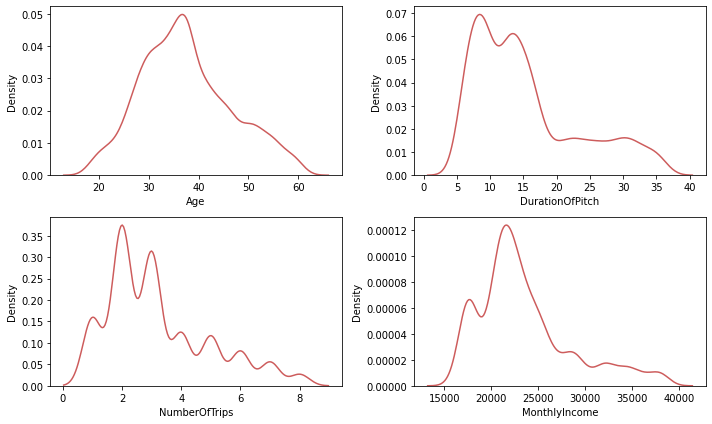

In [39]:
# distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_clean[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

Berdasarkan hasil visualiasi tersebut, maka:
- Kolom `Age` akan dilakukan scaling dengan Normalization karena mendekati distribusi normal.
- Kolom `NumberOfTrips` tidak dilakukan scaling karena nilai datanya tidak terlalu variatif setelah dihandling outlier.
- Kolom `DurationOfPitch` dan `MonthlyIncome` akan dilakukan scaling dengan Standardization karena sedikit skewed.

In [40]:
# scaling using normalization
df_clean['Age'] = MinMaxScaler().fit_transform(df_clean['Age'].values.reshape(-1, 1))
# scaling using standardization
df_clean['DurationOfPitch'] = StandardScaler().fit_transform(df_clean['DurationOfPitch'].values.reshape(-1, 1))
df_clean['MonthlyIncome'] = StandardScaler().fit_transform(df_clean['MonthlyIncome'].values.reshape(-1, 1))

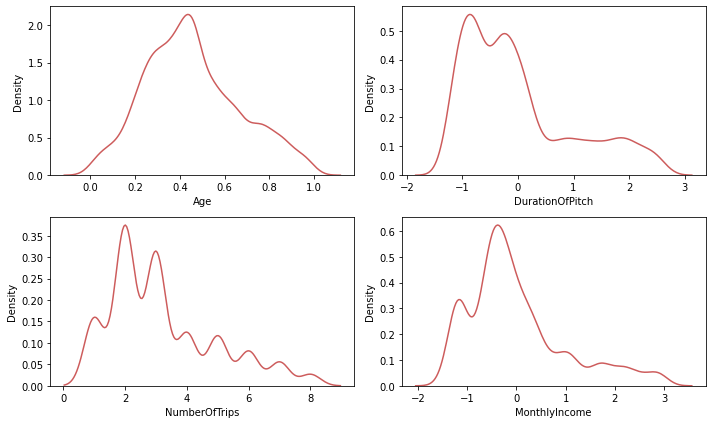

In [41]:
# distribution of data after scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_clean[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [42]:
# statistics data after transformation
df_clean[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,4737.000000,4.737000e+03,4737.000000,4.737000e+03
mean,0.455493,-1.145613e-16,3.211948,-1.453804e-15
std,0.212082,1.000106e+00,1.751640,1.000106e+00
min,0.000000,-1.289734e+00,1.000000,-1.494390e+00
25%,0.302326,-7.908081e-01,2.000000,-6.049141e-01
50%,0.441860,-2.918825e-01,3.000000,-2.340508e-01
75%,0.581395,4.565059e-01,4.000000,3.706653e-01
max,1.000000,2.576940e+00,8.000000,3.013241e+00


Dari hasil statistik tersebut diketahui bahwa:
- Kolom `Age` memiliki nilai min = 0 dan nilai max = 1 setelah dilakukan normalisasi.
- Kolom `NumberOfTrips` memiliki nilai min = 1 dan nilai max = 8 dianggap tidak terlalu variatif range datanya. 
- Kolom `DurationOfPitch` dan `MonthlyIncome` memiliki nilai mean mendekati 0 dan nilai standar deviasi = 1 setelah dilakukan standardisasi

### Feature Encoding

In [43]:
# view unique values on categorical columns
for col in df_prep.select_dtypes(include='object').columns:
    print(f'{col} : {df_clean[col].unique().tolist()}')
    print(df_clean[col].value_counts())
    print('------------------------------------------')

TypeofContact : ['Self Enquiry', 'Company Invited', 'Unknown']
Self Enquiry       3346
Company Invited    1366
Unknown              25
Name: TypeofContact, dtype: int64
------------------------------------------
Occupation : ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Salaried          2287
Small Business    2028
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------------------
Gender : ['Female', 'Male']
Male      2829
Female    1908
Name: Gender, dtype: int64
------------------------------------------
ProductPitched : ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
Basic           1794
Deluxe          1680
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
------------------------------------------
MaritalStatus : ['Unmarried', 'Divorced', 'Married']
Married      2277
Unmarried    1512
Divorced      948
Name: MaritalStatus, dtype: int64
--------------------

Dari hasil tersebut maka dapat disimpulkan bahwa:
- Pada kolom `Occupation` terlihat jumlah customer 'Free Lancer' terlalu sedikit sehingga dapat dihapus.
- Kolom `Gender` memiliki *unique values* berjumlah 2 maka dapat dilakukan Label Encoding.
- Kolom `ProductPitched` dan `Designation` memiliki *unique values* berjenis data ordinal maka dapat dilakukan Label Encoding.
- Kolom `TypeofContact`, `Occupation`, dan `MaritalStatus` memiliki unique values lebih dari 2 dan tidak berjenis data ordinal sehingga dilakukan One Hot Encoding.

In [44]:
# remove rows with Occupation is `Free Lancer`
df_clean = df_clean[df_clean['Occupation']!='Free Lancer']

# view dimension size of data before encoding
print(f'Dimensi data sebelum encoding adalah {df_clean.shape[0]} baris dan {df_clean.shape[1]} kolom')

# label encoding
df_clean['Gender'] = df_clean['Gender'].map({'Female':0, 'Male':1})
df_clean['ProductPitched'] = df_clean['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_clean['Designation'] = df_clean['Designation'].map({'Manager':0, 'Senior Manager':1, 'Executive':2,
                                                     'AVP':3, 'VP':4})

# one hot encoding
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(df_clean[col], prefix=col)
    df_clean = pd.concat([df_clean, onehots], axis=1)
    df_clean.drop(columns=col, axis=1, inplace=True)
    
# view dimension size of data before encoding
print(f'Dimensi data setelah encoding adalah {df_clean.shape[0]} baris dan {df_clean.shape[1]} kolom')

Dimensi data sebelum encoding adalah 4735 baris dan 19 kolom
Dimensi data setelah encoding adalah 4735 baris dan 25 kolom


### Feature Selection

In [46]:
# check correlation to target
df_clean.corr()['ProdTaken'].iloc[1:]

Age                             -0.142819
CityTier                         0.088483
DurationOfPitch                  0.080149
Gender                           0.029351
NumberOfFollowups                0.108264
ProductPitched                  -0.218802
PreferredPropertyStar            0.096755
NumberOfTrips                    0.020386
Passport                         0.261313
PitchSatisfactionScore           0.051937
OwnCar                          -0.010679
Designation                      0.074768
MonthlyIncome                   -0.130784
TypeofContact_Company Invited    0.042052
TypeofContact_Self Enquiry      -0.039811
TypeofContact_Unknown           -0.012674
Occupation_Large Business        0.070456
Occupation_Salaried             -0.032312
Occupation_Small Business       -0.007851
MaritalStatus_Divorced          -0.073203
MaritalStatus_Married           -0.123330
MaritalStatus_Unmarried          0.195070
TotalVisiting                    0.012477
Name: ProdTaken, dtype: float64

In [47]:
# select features correlation > 0.1
features_cols = []
for i,val in enumerate(df_clean.corr()['ProdTaken'].iloc[1:]):
    if np.abs(val) > 0.1:
        features_cols.append(df_clean.iloc[:,1:].columns[i])
features_cols

['Age',
 'NumberOfFollowups',
 'ProductPitched',
 'Passport',
 'MonthlyIncome',
 'MaritalStatus_Married',
 'MaritalStatus_Unmarried']

In [48]:
# select features with chi square test
chi2_check = []
check_cols = ['CityTier', 'Gender', 'NumberOfFollowups', 'ProductPitched', 
              'PreferredPropertyStar','Passport', 'PitchSatisfactionScore', 'OwnCar',
              'Designation', 'TypeofContact_Company Invited',
              'TypeofContact_Self Enquiry', 'TypeofContact_Unknown', 
              'Occupation_Large Business', 'Occupation_Salaried',
              'Occupation_Small Business', 'MaritalStatus_Divorced',
              'MaritalStatus_Married', 'MaritalStatus_Unmarried']
# check_cols = df_prep.corr()['ProdTaken'].iloc[1:].index.tolist()
for i in check_cols:
    if stats.chi2_contingency(pd.crosstab(df_clean['ProdTaken'], df_clean[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[check_cols, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,CityTier,Reject Null Hypothesis
1,Gender,Reject Null Hypothesis
2,NumberOfFollowups,Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,PreferredPropertyStar,Reject Null Hypothesis
5,Passport,Reject Null Hypothesis
6,PitchSatisfactionScore,Reject Null Hypothesis
7,OwnCar,Fail to Reject Null Hypothesis
8,Designation,Reject Null Hypothesis
9,TypeofContact_Company Invited,Reject Null Hypothesis


In [49]:
chi2_result = result[result['Hypothesis Result']=='Reject Null Hypothesis']['Column'].values.tolist()
fix_cols = features_cols
for col in chi2_result:
    if col not in features_cols:
        fix_cols.append(col)
fix_cols

['Age',
 'NumberOfFollowups',
 'ProductPitched',
 'Passport',
 'MonthlyIncome',
 'MaritalStatus_Married',
 'MaritalStatus_Unmarried',
 'CityTier',
 'Gender',
 'PreferredPropertyStar',
 'PitchSatisfactionScore',
 'Designation',
 'TypeofContact_Company Invited',
 'TypeofContact_Self Enquiry',
 'Occupation_Large Business',
 'Occupation_Salaried',
 'MaritalStatus_Divorced']

In [50]:
df_clean_model = df_clean.copy()
df_clean_model.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Unmarried,TotalVisiting
0,1,0.534884,3,-1.165002,0,3.0,2,3.0,1.0,1,2,1,0,-0.503300,0,1,0,0,1,0,0,0,1,3.0
1,0,0.720930,1,-0.167151,1,4.0,2,4.0,2.0,0,3,1,0,-0.674911,1,0,0,0,1,0,1,0,0,5.0
3,0,0.348837,1,-0.790808,0,3.0,0,3.0,2.0,1,5,1,2,-1.116566,1,0,0,0,1,0,1,0,0,3.0
4,0,0.456332,1,-0.915540,1,3.0,0,4.0,1.0,0,5,1,2,-1.005407,0,1,0,0,0,1,1,0,0,2.0
5,0,0.325581,1,-0.915540,1,3.0,0,3.0,1.0,0,5,1,2,-1.084949,1,0,0,0,1,0,0,0,1,4.0


In [51]:
# save file preprocessing into csv
df_clean_model.to_csv('Travel_Preprocessing.csv', index=False)

# Stage 3 Machine Learning Modelling & Evaluation

# Data Modelling #1

Disini akan dicoba menggunakan semua fitur terlebih dahulu

In [52]:
X = df_clean_model.drop('ProdTaken', axis=1)
y = df_clean_model['ProdTaken']

## Split Train & Test Set

In [53]:
# splitting into data train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Jumlah data latih  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

print(f'Jumlah data uji terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_test==0)}')
print(f'Jumlah class 1 : {sum(y_test==1)}\n')

Jumlah data latih  terdiri dari 3788 baris
Jumlah class 0 : 3068
Jumlah class 1 : 720

Jumlah data uji terdiri dari 947 baris
Jumlah class 0 : 777
Jumlah class 1 : 170



## Model Selection

In [54]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()

### 1. Logistic Regression

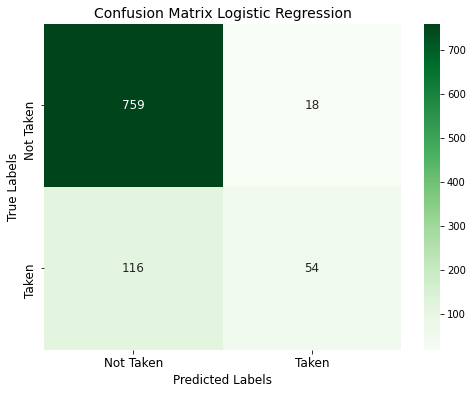

In [55]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 54
- Jumlah TN (True Negative) = 759
- Jumlah FP (False Positive) = 18
- Jumlah FN (False Negative) = 116

### 2. Decision Tree

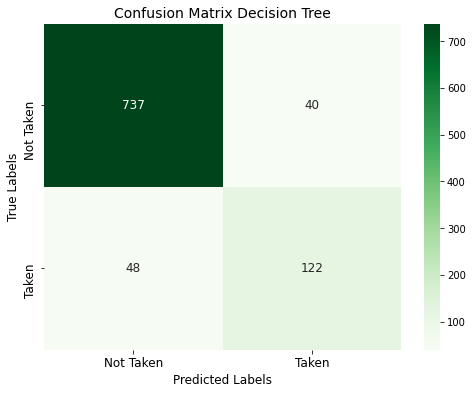

In [56]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 122
- Jumlah TN (True Negative) = 737
- Jumlah FP (False Positive) = 40
- Jumlah FN (False Negative) = 48

### 3. Random Forest

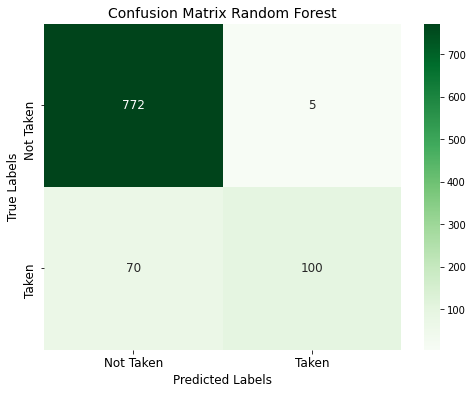

In [57]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 100
- Jumlah TN (True Negative) = 772
- Jumlah FP (False Positive) = 5
- Jumlah FN (False Negative) = 70

### 4. AdaBoost

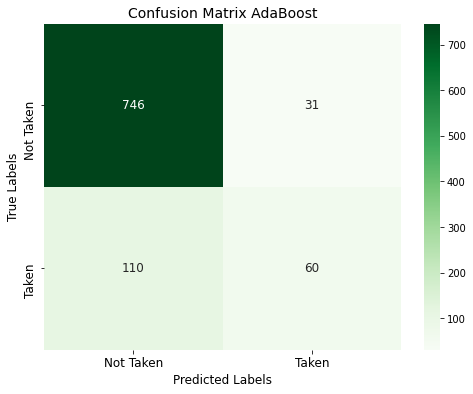

In [58]:
model_adb = AdaBoostClassifier(random_state=42)
model_adb.fit(X_train, y_train)

plotting_confusion_matrix(model_adb, X_test, y_test, title='AdaBoost')

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 60
- Jumlah TN (True Negative) = 746
- Jumlah FP (False Positive) = 31
- Jumlah FN (False Negative) = 110

### 5. XGBoost

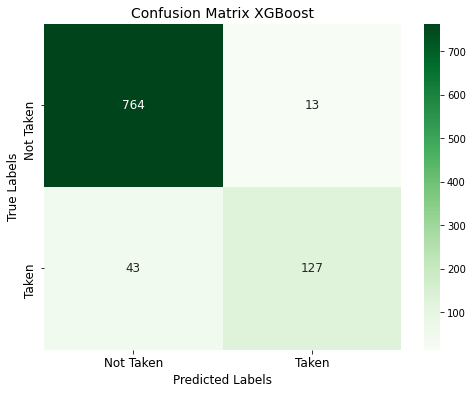

In [59]:
model_xgb = XGBClassifier(verbosity=0, random_state=42)
model_xgb.fit(X_train, y_train)

plotting_confusion_matrix(model_xgb, X_test, y_test, title='XGBoost')

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 127
- Jumlah TN (True Negative) = 764
- Jumlah FP (False Positive) = 13
- Jumlah FN (False Negative) = 43

## Model Evaluation

Pada kasus kita bertujuan untuk memprediksi apakah pelanggan akan membeli paket perjalanan berdasarkan data yang tersedia kemungkinan masih ada pelanggan yang potensial untuk terkonversi membeli paket perjalanan, maka:
- Metric evaluasi yang akan kita fokuskan adalah **F1 Score** dimana kita ingin mempertimbangkan hasil dari pelanggan yang akan terkonversi membeli paket (Precision) dan hasil dari pelanggan yang diprediksi membeli ternyata benar terkonversi membeli paket (Recall).
- Karena data target pada kasus kita terjadi imbalance class sehingga kita juga akan mempertimbangkan nilai **AUC** sebagai pendukung untuk mengukur apakah model bisa membedakan pelanggan antar kelas. Nilai AUC yang tinggi membuktikan bahwa model yang digunakan sudah cukup baik dalam membedakan kelas negative dan positive.

In [60]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [61]:
# scoring base model
model_list_base = [model_lr, model_dt, model_rf, model_adb, model_xgb]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8585,0.7500,0.3176,0.4463,0.4264,0.8358,0.8043
1,Decision Tree,0.9071,0.7531,0.7176,0.7349,0.6789,0.8331,1.0000
2,Random Forest,0.9208,0.9524,0.5882,0.7273,0.7111,0.9740,1.0000
3,AdaBoost,0.8511,0.6593,0.3529,0.4598,0.4076,0.8380,0.8343
4,XGBoost,0.9409,0.9071,0.7471,0.8194,0.7897,0.9708,1.0000


Dari hasil evaluasi kelima model tersebut didapatkan bahwa:
- **Model Logistic Regression** mampu menghasilkan F1 Score cukup rendah yaitu 44.63% dimana nilai Precision yang tinggi tetapi nilai Recall sangat rendah walaupun model sudah cukup bestfit.
- **Model Decision Tree** mampu mneghasilkan F1 Score cukup tinggi yaitu 73.49% dimana perbedaan antara nilai Precision dan Recall hanya 4% tetapi model masih mengalami overfit.
- **Model Random Forest** mampu menghasilkan F1 Score cukup tinggi yaitu 72.72% dimana nilai Precision yang tinggi tetapi nilai Recall cukup rendah walaupun model sudah cukup bestfit.
- **Model AdaBoost** mampu menghasilkan F1 Score cukup rendah yaitu 45.98% dimana nilai Precision yang tinggi tetapi nilai Recall cukup rendah walaupun model sudah cukup bestfit.
- **Model XGBoost** mampu menghasilkan F1 Score yang tinggi yaitu 81.94% dimana nilai Precision yang tinggi tetapi nilai Recall belum cukup tinggi dan model sudah cukup bestfit.

Maka dapat disimpulkan dari kelima model yang dipilih, **Model XGBoost** merupakan base model terbaik dengan F1 Score paling tinggi yaitu 81.94% dan hasil scoring metric yang lain juga lebih unggul.

## Hyperparameter Tuning

In [62]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    }, 
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], 
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])

### 1. Logistic Regression

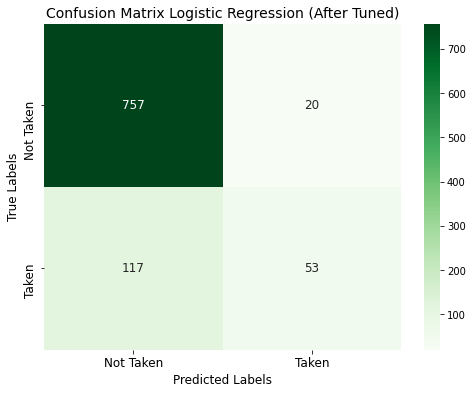

In [63]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='f1', random_state=42)
tuned_lr.fit(X_train, y_train)

plotting_confusion_matrix(tuned_lr, X_test, y_test, title='Logistic Regression (After Tuned)')

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 53
- Jumlah TN (True Negative) = 757
- Jumlah FP (False Positive) = 20
- Jumlah FN (False Negative) = 117

In [64]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_lr, list_hyperparameters[0])
print('=====================================================')

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 54.555947811685144


### 2. Decision Tree

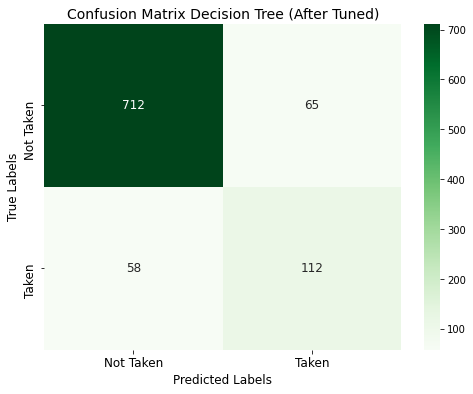

In [65]:
model_dt = DecisionTreeClassifier(random_state=42)
tuned_dt = RandomizedSearchCV(model_dt, list_hyperparameters[1], cv=5, scoring='f1', random_state=42)
tuned_dt.fit(X_train, y_train)

plotting_confusion_matrix(tuned_dt, X_test, y_test, title='Decision Tree (After Tuned)')

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 112
- Jumlah TN (True Negative) = 712
- Jumlah FP (False Positive) = 65
- Jumlah FN (False Negative) = 58

In [66]:
print('MODEL DECISION TREE AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_dt, list_hyperparameters[1])
print('===============================================')

MODEL DECISION TREE AFTER HYPERPARAMETER TUNING
Best max_depth: 100
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto


### 3. Random Forest

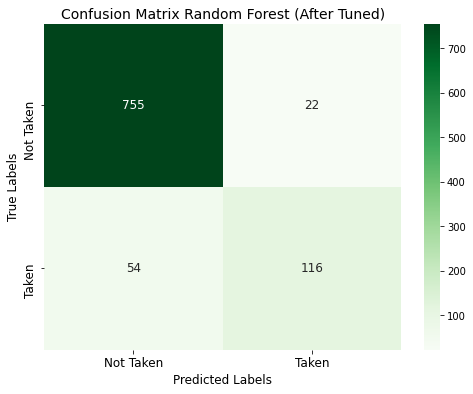

In [67]:
model_rf = RandomForestClassifier(random_state=42)
tuned_rf = RandomizedSearchCV(model_rf, list_hyperparameters[2], cv=5, scoring='f1', random_state=42)
tuned_rf.fit(X_train, y_train)

plotting_confusion_matrix(tuned_rf, X_test, y_test, title='Random Forest (After Tuned)')

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 116
- Jumlah TN (True Negative) = 755
- Jumlah FP (False Positive) = 22
- Jumlah FN (False Negative) = 54

In [68]:
print('MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_rf, list_hyperparameters[2])
print('===============================================')

MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING
Best n_estimators: 941
Best max_features: log2
Best max_depth: 80
Best criterion: gini
Best min_samples_split: 8
Best min_samples_leaf: 1
Best class_weight: balanced_subsample
Best oob_score: True


### 4. AdaBoost

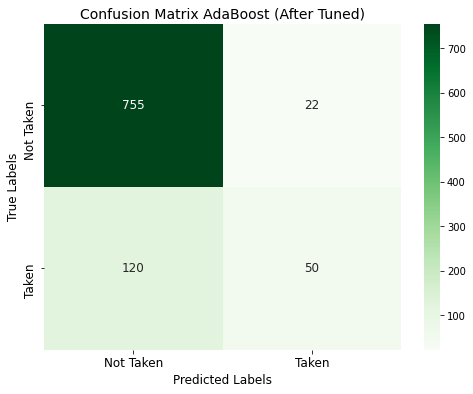

In [69]:
model_adb = AdaBoostClassifier(random_state=42)
tuned_adb = RandomizedSearchCV(model_adb, list_hyperparameters[3], cv=5, scoring='f1', random_state=42)
tuned_adb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_adb, X_test, y_test, title='AdaBoost (After Tuned)')

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 50
- Jumlah TN (True Negative) = 755
- Jumlah FP (False Positive) = 22
- Jumlah FN (False Negative) = 120

In [70]:
print('MODEL ADABOOST AFTER HYPERPARAMETER TUNING')
print('==========================================')
show_best_hyperparameter(tuned_adb, list_hyperparameters[3])
print('==========================================')

MODEL ADABOOST AFTER HYPERPARAMETER TUNING
Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R


### 5. XGBoost

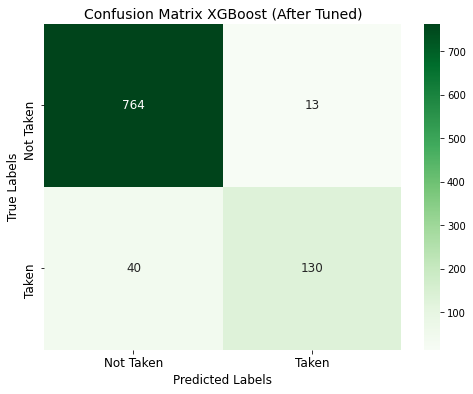

In [71]:
model_xgb = XGBClassifier(random_state=42, verbosity=0)
tuned_xgb = RandomizedSearchCV(model_xgb, list_hyperparameters[-1], cv=5, scoring='f1', random_state=42)
tuned_xgb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_xgb, X_test, y_test, title='XGBoost (After Tuned)')

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 130
- Jumlah TN (True Negative) = 764
- Jumlah FP (False Positive) = 13
- Jumlah FN (False Negative) = 40

In [72]:
print('MODEL XGBOOST AFTER HYPERPARAMETER TUNING')
print('=========================================')
show_best_hyperparameter(tuned_xgb, list_hyperparameters[-1])
print('=========================================')

MODEL XGBOOST AFTER HYPERPARAMETER TUNING
Best max_depth: 100
Best min_child_weight: 2
Best gamma: 0.1
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best learning_rate: 0.5252525252525253
Best reg_lambda: 0.8
Best reg_alpha: 0.8


In [73]:
# base model
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8585,0.7500,0.3176,0.4463,0.4264,0.8358,0.8043
1,Decision Tree,0.9071,0.7531,0.7176,0.7349,0.6789,0.8331,1.0000
2,Random Forest,0.9208,0.9524,0.5882,0.7273,0.7111,0.9740,1.0000
3,AdaBoost,0.8511,0.6593,0.3529,0.4598,0.4076,0.8380,0.8343
4,XGBoost,0.9409,0.9071,0.7471,0.8194,0.7897,0.9708,1.0000


In [74]:
# tuned model
model_list_tuned = [tuned_lr, tuned_dt, tuned_rf, tuned_adb, tuned_xgb]
score_all_classification(model_list_tuned, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8553,0.7260,0.3118,0.4362,0.4115,0.8362,0.8043
1,Decision Tree,0.8701,0.6328,0.6588,0.6455,0.5662,0.7876,1.0000
2,Random Forest,0.9197,0.8406,0.6824,0.7532,0.7114,0.9619,0.9996
3,AdaBoost,0.8501,0.6944,0.2941,0.4132,0.3849,0.8507,0.8363
4,XGBoost,0.9440,0.9091,0.7647,0.8307,0.8017,0.9683,1.0000


Dari hasil evaluasi tersebut dapat disimpulkan bahwa:
- **Model Logistic Regression** menghasilkan F1 Score 43.62% dimana hasilnya sedikit lebih rendah setelah dituning hyperparameternya dibandingkan base modelnya dan perbedaan nilai Precision dan Recall masih timpang walaupun modelnya cukup bestfit.
- **Model Decision Tree** menghasilkan F1 Score 64.55% dimana hasilnya turun sekitar 9% setelah dituning hyperparameternya dan nilai Precision dan Recall juga turun walaupun perbedaannya sedikit tetapi model masih mengalami overfit.
- **Model Random Forest** menghasilkan F1 Score 75.32% dimana hasilnya naik sekitar 2.5% setelah dituning hyperparameternya dan menurunkan sedikit nilai Precision tetapi menaikkan nilai Recall dan model sudah cukup bestfit.
- **Model AdaBoost** menghasilkan F1 Score 41.32% dimana hasilnya turun sekitar 4.5% setelah dituninng hyperparameternya dan nilai Precision sedikit naik tetapi nilai Recall menjadi lebih rendah walaupun model cukup bestfit.
- **Model XGBoost** menghasilkan F1 Score 83.07% dimana hasilnya naik sekitar 1% setelah dituning hyperparameternya dan nilai Precision dan Recall juga sedikit mengalami kenaikan serta model sudah cukup bestfit.

Dari hasil kelima model tersebut, maka dapat disimpulkan model **XGBoost** tetap menjadi model yang terbaik dengan F1 Score paling tinggi yaitu **83.07%** dan hasil scoring metric yang lain juga lebih unggul dengan hyperparameter tuning yang telah dilakukan.

## Feature Importance

In [75]:
def show_feature_importance(model, title):
    if type(model).__name__ == 'LogisticRegression':
        feat_importances = pd.Series(model.coef_[0], index=X.columns)
    else:
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        
    ax = feat_importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8), color='orange')
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance ' + title)

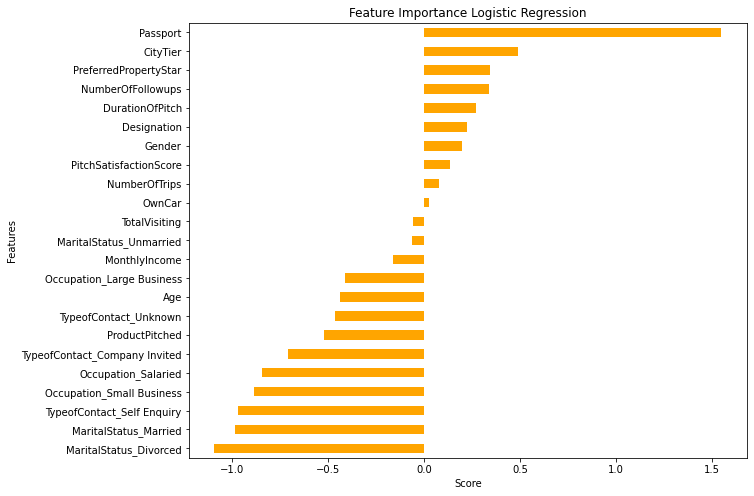

In [76]:
# Logistic Regression
show_feature_importance(tuned_lr.best_estimator_, title='Logistic Regression')

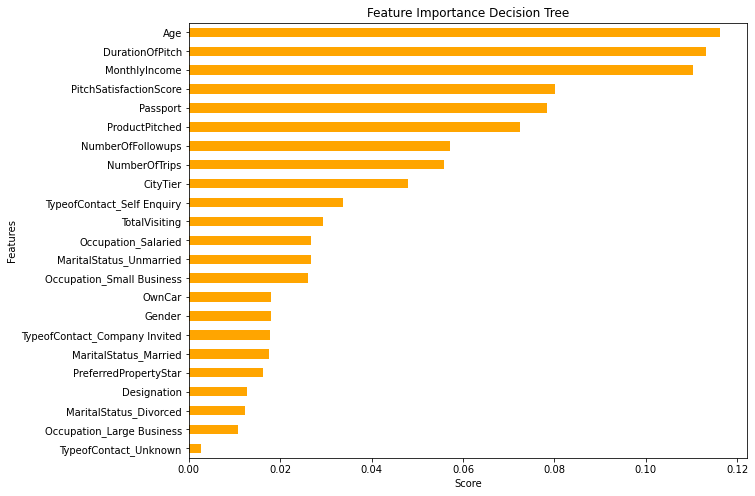

In [77]:
# Decision Tree
show_feature_importance(tuned_dt.best_estimator_, title='Decision Tree')

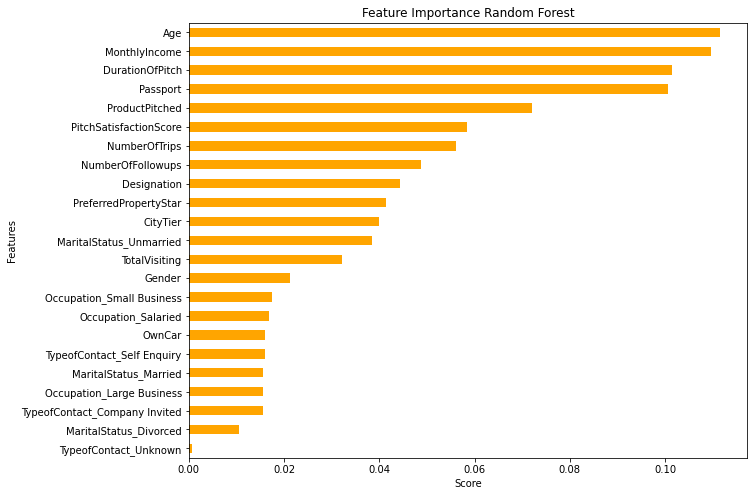

In [78]:
# Random Forest
show_feature_importance(tuned_rf.best_estimator_, title='Random Forest')

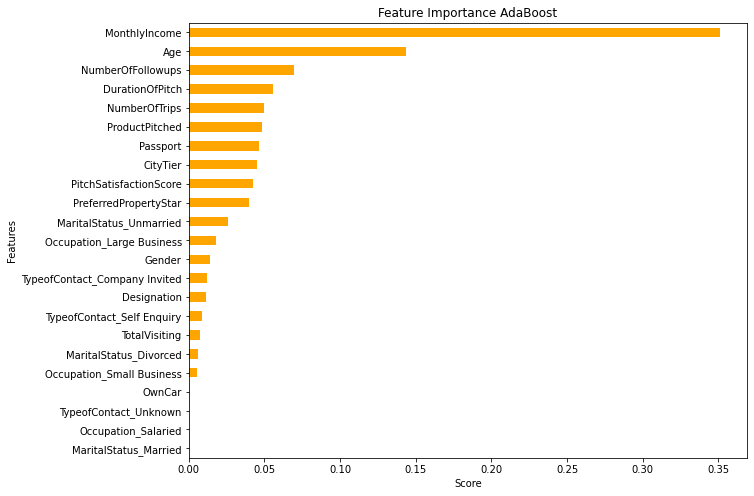

In [79]:
# AdaBoost
show_feature_importance(tuned_adb.best_estimator_, title='AdaBoost')

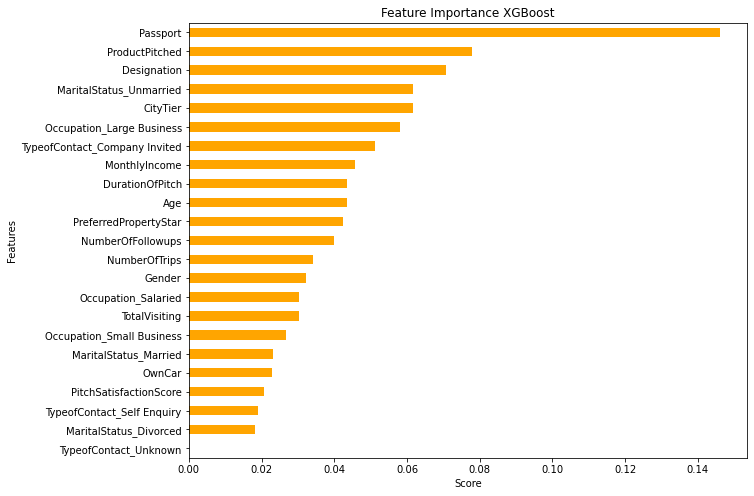

In [80]:
# XGBoost
show_feature_importance(tuned_xgb.best_estimator_, title='XGBoost')

## Feature Selection

Dari hasil feature importance kelima model tersebut, hanya akan dipilih berdasarkan 2 model terbaik yaitu Random Forest dan XGBoost dimana dari gabungan keduanya akan dipilih 17 fitur dari semua fitur yang ada yang akan coba dimodelkan ulang.

In [81]:
# selecting feature by feature importance from model Random Forest and XGBoost
feature_rf = pd.Series(tuned_rf.best_estimator_.feature_importances_, index=X.columns).nlargest(17).index.tolist()
feature_xgb = pd.Series(tuned_xgb.best_estimator_.feature_importances_, index=X.columns).nlargest(17).index.tolist()

selected_cols = [col for col in feature_rf]
for col in feature_xgb:
    if col not in selected_cols:
        selected_cols.append(col)
        
selected_cols

['Age',
 'MonthlyIncome',
 'DurationOfPitch',
 'Passport',
 'ProductPitched',
 'PitchSatisfactionScore',
 'NumberOfTrips',
 'NumberOfFollowups',
 'Designation',
 'PreferredPropertyStar',
 'CityTier',
 'MaritalStatus_Unmarried',
 'TotalVisiting',
 'Gender',
 'Occupation_Small Business',
 'Occupation_Salaried',
 'OwnCar',
 'Occupation_Large Business',
 'TypeofContact_Company Invited']

# Data Modelling #2

Pada modelling ini akan digunakan kolom berdasarkan feature importance sebelumnya dimana hasilnya kurang lebih sama dengan hasil feature selection saat preprocessing sebelumnya.

In [82]:
# create train and test set using selected feature
X_train2 = X_train[selected_cols]
y_train2 = y_train.copy()
X_test2 = X_test[selected_cols]
y_test2 = y_test.copy()

## Model Selection

### 1. Logistic Regression

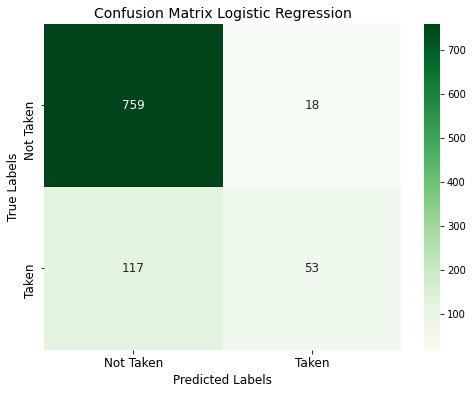

In [83]:
model_lr2 = LogisticRegression(random_state=42)
model_lr2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_lr2, X_test2, y_test2, title='Logistic Regression')

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 53
- Jumlah TN (True Negative) = 759
- Jumlah FP (False Positive) = 18
- Jumlah FN (False Negative) = 117

### 2. Decision Tree

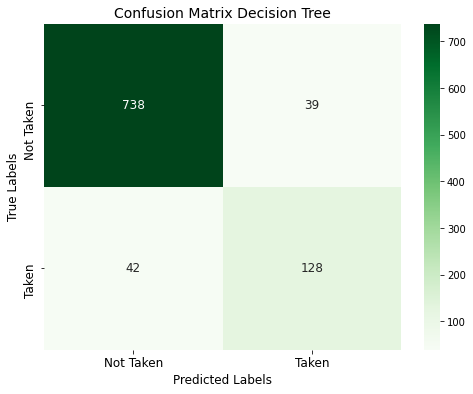

In [84]:
model_dt2 = DecisionTreeClassifier(random_state=42)
model_dt2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_dt2, X_test2, y_test2, title='Decision Tree')

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 128
- Jumlah TN (True Negative) = 738
- Jumlah FP (False Positive) = 39
- Jumlah FN (False Negative) = 42

### 3. Random Forest

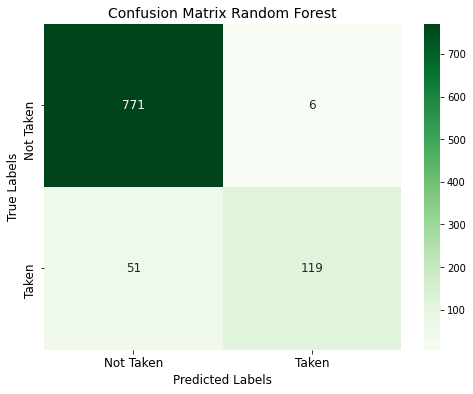

In [85]:
model_rf2 = RandomForestClassifier(random_state=42)
model_rf2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_rf2, X_test2, y_test2, title='Random Forest')

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 119
- Jumlah TN (True Negative) = 771
- Jumlah FP (False Positive) = 6
- Jumlah FN (False Negative) = 51

### 4. AdaBoost

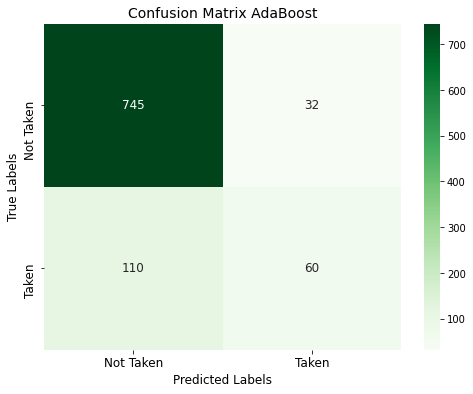

In [86]:
model_adb2 = AdaBoostClassifier(random_state=42)
model_adb2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_adb2, X_test2, y_test2, title='AdaBoost')

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 60
- Jumlah TN (True Negative) = 745
- Jumlah FP (False Positive) = 32
- Jumlah FN (False Negative) = 110

### 5. XGBoost

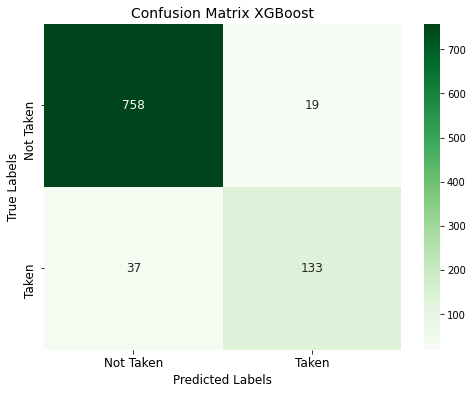

In [87]:
model_xgb2 = XGBClassifier(verbosity=0, random_state=42)
model_xgb2.fit(X_train2, y_train2)

plotting_confusion_matrix(model_xgb2, X_test2, y_test2, title='XGBoost')

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 133
- Jumlah TN (True Negative) = 758
- Jumlah FP (False Positive) = 19
- Jumlah FN (False Negative) = 37

## Model Evaluation

In [88]:
# scoring base model
model_list_base2 = [model_lr2, model_dt2, model_rf2, model_adb2, model_xgb2]
score_all_classification(model_list_base2, X_train2, y_train2, X_test2, y_test2)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8574,0.7465,0.3118,0.4398,0.4206,0.8360,0.8041
1,Decision Tree,0.9145,0.7665,0.7529,0.7596,0.7077,0.8514,1.0000
2,Random Forest,0.9398,0.9520,0.7000,0.8068,0.7849,0.9826,1.0000
3,AdaBoost,0.8501,0.6522,0.3529,0.4580,0.4040,0.8380,0.8342
4,XGBoost,0.9409,0.8750,0.7824,0.8261,0.7924,0.9692,1.0000


Dari hasil evaluasi kelima model tersebut didapatkan bahwa:
- **Model Logistic Regression** mampu menghasilkan F1 Score cukup rendah yaitu 43.98% dimana nilai Precision yang tinggi tetapi nilai Recall sangat rendah walaupun model sudah cukup bestfit.
- **Model Decision Tree** mampu mneghasilkan F1 Score cukup tinggi yaitu 75.96% dimana perbedaan antara nilai Precision dan Recall hanya sekitar 1% tetapi model masih mengalami overfit.
- **Model Random Forest** mampu menghasilkan F1 Score cukup tinggi yaitu 80.68% dimana nilai Precision yang tinggi tetapi nilai Recall belum cukup tinggi walaupun model sudah cukup bestfit.
- **Model AdaBoost** mampu menghasilkan F1 Score cukup rendah yaitu 45.80% dimana nilai Precision yang tinggi tetapi nilai Recall cukup rendah walaupun model sudah cukup bestfit.
- **Model XGBoost** mampu menghasilkan F1 Score yang tinggi yaitu 82.61% dimana nilai Precision dan Recall cukup tinggi walaupun perbedaanya sekitar 9% dan model sudah cukup bestfit.

Maka dapat disimpulkan dari kelima model yang dipilih, **Model XGBoost** merupakan base model terbaik dengan F1 Score paling tinggi yaitu 82.61% dimana hasil ini lebih tinggi saat dilakukan feature selection.

## Hyperparameter Tuning

### 1. Logistic Regression

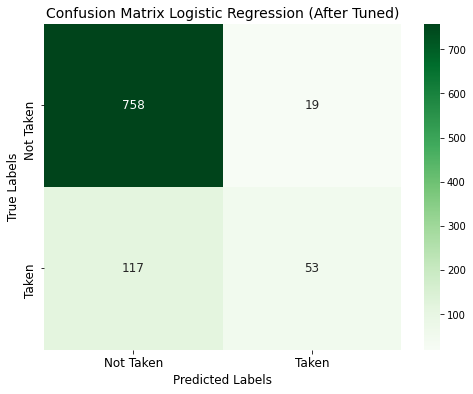

In [89]:
model_lr2 = LogisticRegression(random_state=42)
tuned_lr2 = RandomizedSearchCV(model_lr2, list_hyperparameters[0], cv=5, scoring='f1', random_state=42)
tuned_lr2.fit(X_train2, y_train2)

plotting_confusion_matrix(tuned_lr2, X_test2, y_test2, title='Logistic Regression (After Tuned)')

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 53
- Jumlah TN (True Negative) = 758
- Jumlah FP (False Positive) = 19
- Jumlah FN (False Negative) = 117

In [90]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_lr2, list_hyperparameters[0])
print('=====================================================')

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 6.158482110660261


### 2. Decision Tree

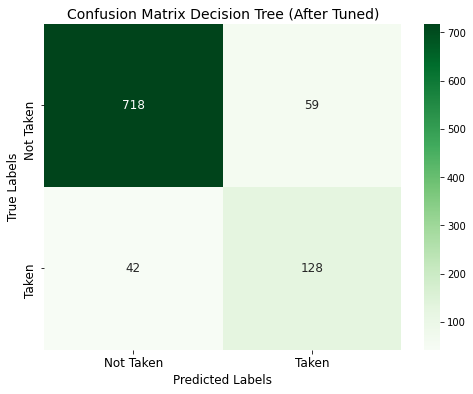

In [91]:
model_dt2 = DecisionTreeClassifier(random_state=42)
tuned_dt2 = RandomizedSearchCV(model_dt2, list_hyperparameters[1], cv=5, scoring='f1', random_state=42)
tuned_dt2.fit(X_train2, y_train2)

plotting_confusion_matrix(tuned_dt2, X_test2, y_test2, title='Decision Tree (After Tuned)')

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 128
- Jumlah TN (True Negative) = 718
- Jumlah FP (False Positive) = 59
- Jumlah FN (False Negative) = 42

In [92]:
print('MODEL DECISION TREE AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_dt2, list_hyperparameters[1])
print('===============================================')

MODEL DECISION TREE AFTER HYPERPARAMETER TUNING
Best max_depth: 100
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto


### 3. Random Forest

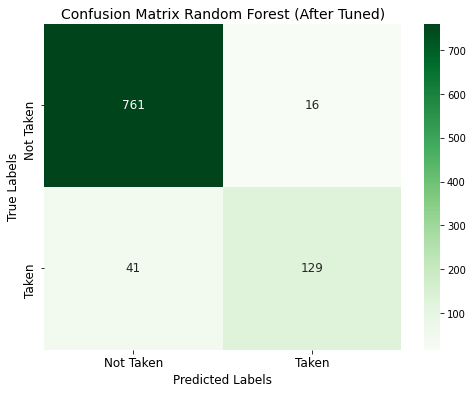

In [93]:
model_rf2 = RandomForestClassifier(random_state=42)
tuned_rf2 = RandomizedSearchCV(model_rf2, list_hyperparameters[2], cv=5, scoring='f1', random_state=42)
tuned_rf2.fit(X_train2, y_train2)

plotting_confusion_matrix(tuned_rf2, X_test2, y_test2, title='Random Forest (After Tuned)')

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 129
- Jumlah TN (True Negative) = 761
- Jumlah FP (False Positive) = 16
- Jumlah FN (False Negative) = 41

In [94]:
print('MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_rf2, list_hyperparameters[2])
print('===============================================')

MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING
Best n_estimators: 709
Best max_features: log2
Best max_depth: 50
Best criterion: entropy
Best min_samples_split: 6
Best min_samples_leaf: 1
Best class_weight: balanced
Best oob_score: True


### 4. AdaBoost

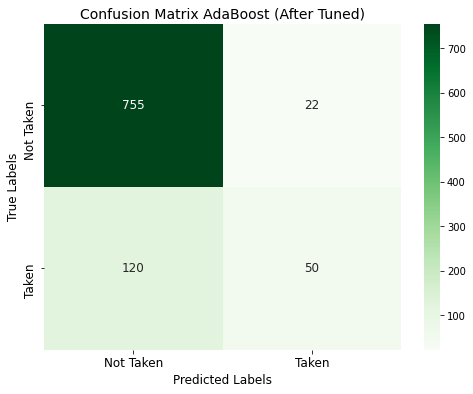

In [95]:
model_adb2 = AdaBoostClassifier(random_state=42)
tuned_adb2 = RandomizedSearchCV(model_adb2, list_hyperparameters[3], cv=5, scoring='f1', random_state=42)
tuned_adb2.fit(X_train2, y_train2)

plotting_confusion_matrix(tuned_adb2, X_test2, y_test2, title='AdaBoost (After Tuned)')

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 50
- Jumlah TN (True Negative) = 755
- Jumlah FP (False Positive) = 22
- Jumlah FN (False Negative) = 120

In [96]:
print('MODEL ADABOOST AFTER HYPERPARAMETER TUNING')
print('==========================================')
show_best_hyperparameter(tuned_adb2, list_hyperparameters[3])
print('==========================================')

MODEL ADABOOST AFTER HYPERPARAMETER TUNING
Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R


### 5. XGBoost

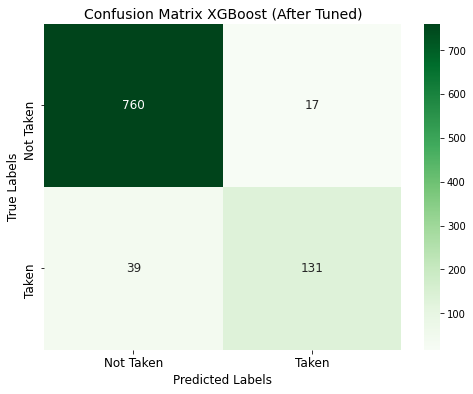

In [97]:
model_xgb2 = XGBClassifier(random_state=42, verbosity=0)
tuned_xgb2 = RandomizedSearchCV(model_xgb2, list_hyperparameters[-1], cv=5, scoring='f1', random_state=42)
tuned_xgb2.fit(X_train2, y_train2)

plotting_confusion_matrix(tuned_xgb2, X_test2, y_test2, title='XGBoost (After Tuned)')

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 131
- Jumlah TN (True Negative) = 760
- Jumlah FP (False Positive) = 17
- Jumlah FN (False Negative) = 39

In [98]:
print('MODEL XGBOOST AFTER HYPERPARAMETER TUNING')
print('=========================================')
show_best_hyperparameter(tuned_xgb2, list_hyperparameters[-1])
print('=========================================')

MODEL XGBOOST AFTER HYPERPARAMETER TUNING
Best max_depth: 20
Best min_child_weight: 3
Best gamma: 0.4
Best tree_method: hist
Best colsample_bytree: 0.7000000000000001
Best learning_rate: 0.5757575757575758
Best reg_lambda: 0.8
Best reg_alpha: 0.4


In [99]:
# base model (selected feature)
score_all_classification(model_list_base2, X_train2, y_train2, X_test2, y_test2)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8574,0.7465,0.3118,0.4398,0.4206,0.8360,0.8041
1,Decision Tree,0.9145,0.7665,0.7529,0.7596,0.7077,0.8514,1.0000
2,Random Forest,0.9398,0.9520,0.7000,0.8068,0.7849,0.9826,1.0000
3,AdaBoost,0.8501,0.6522,0.3529,0.4580,0.4040,0.8380,0.8342
4,XGBoost,0.9409,0.8750,0.7824,0.8261,0.7924,0.9692,1.0000


In [100]:
# tuned model (selected feature)
model_list_tuned2 = [tuned_lr2, tuned_dt2, tuned_rf2, tuned_adb2, tuned_xgb2]
score_all_classification(model_list_tuned2, X_train2, y_train2, X_test2, y_test2)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8564,0.7361,0.3118,0.4380,0.4160,0.8362,0.8041
1,Decision Tree,0.8933,0.6845,0.7529,0.7171,0.6527,0.8385,1.0000
2,Random Forest,0.9398,0.8897,0.7588,0.8190,0.7868,0.9754,1.0000
3,AdaBoost,0.8501,0.6944,0.2941,0.4132,0.3849,0.8509,0.8364
4,XGBoost,0.9409,0.8851,0.7706,0.8239,0.7913,0.9707,1.0000


Dari hasil evaluasi tersebut dapat disimpulkan bahwa:
- **Model Logistic Regression** menghasilkan F1 Score 43.80% dimana hasilnya sedikit lebih rendah setelah dituning hyperparameternya dibandingkan base modelnya dan perbedaan nilai Precision dan Recall masih timpang walaupun modelnya cukup bestfit.
- **Model Decision Tree** menghasilkan F1 Score 71.71% dimana hasilnya turun sekitar 4% setelah dituning hyperparameternya dan nilai Precision menjadi turun tetapi nilai Recall masih tetap dan model masih mengalami overfit.
- **Model Random Forest** menghasilkan F1 Score 81.90% dimana hasilnya naik sekitar 1% setelah dituning hyperparameternya dan menurunkan sedikit nilai Precision tetapi menaikkan nilai Recall dan model sudah cukup bestfit.
- **Model AdaBoost** menghasilkan F1 Score 41.32% dimana hasilnya turun sekitar 4.5% setelah dituninng hyperparameternya dan nilai Precision sedikit naik tetapi nilai Recall menjadi lebih rendah walaupun model cukup bestfit.
- **Model XGBoost** menghasilkan F1 Score 82.39% dimana hasilnya sedikit lebih rendah setelah dituning hyperparameternya tetapi nilai Precision sedikit naik dan nilai Recall juga sedikit turun tapi model sudah cukup bestfit.

Dari hasil kelima model tersebut, maka dapat disimpulkan model **XGBoost** tetap menjadi model yang terbaik dengan F1 Score paling tinggi yaitu 82.39% dengan mempertimbangkan hasil sccoring metric yang lain setelah hyperparameter tuning yang dilakukan.

# Modelling Conclusion

1. Dari serangkaian modelling yang telah dilakukan, model dengan feature selection berdasarkan feature importance memberikan hasil yang lebih bagus dimana 19 fitur tersebut antara lain **Age, MonthlyIncome, DurationOfPitch, Passport, ProductPitched, PitchSatisfactionScore, NumberOfTrips, NumberOfFollowups, Designation, PreferredPropertyStar, CityTier, MaritalStatus_Unmarried, TotalVisiting, Gender, Occupation_Small Business, Occupation_Salaried, OwnCar, Occupation_Large Business, TypeofContact_Company Invited**.

2. Model yang memberikan hasil terbaik yaitu model **XGBoost dengan F1 Score 82.39%** dimana telah dilakukan hyperparameter tuning dengan mempertimbangkan nilai metric yang lain. Model ini nantinya akan digunakan untuk menganalisis fitur-fitur yang lebih mendominasi untuk dijadikan insight dan hasil prediksi model akan digunakan sebagai acuan bisnis kami.

# Stage 4 Insights and Recommendation

# Modelling Insights

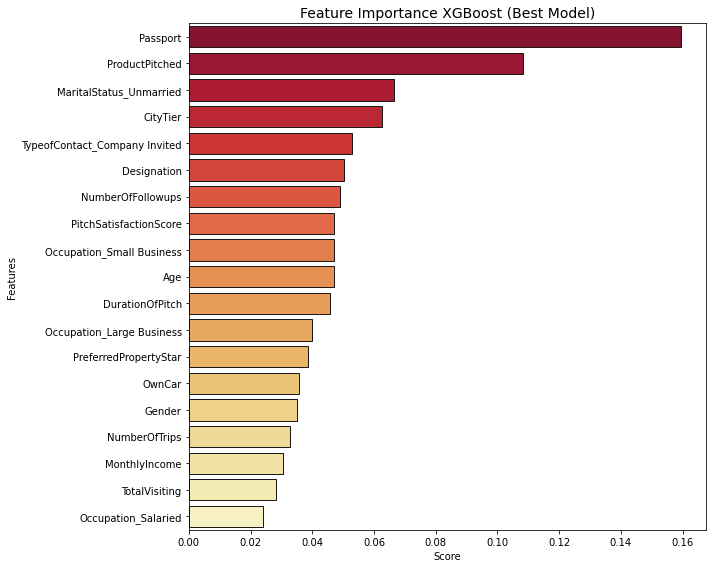

In [101]:
# feature importance using best model
feature_importance_xgb = pd.Series(tuned_xgb2.best_estimator_.feature_importances_, index=X[selected_cols].columns)
df_feature = feature_importance_xgb.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='YlOrRd_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance XGBoost (Best Model)', fontsize=14)
plt.tight_layout()
plt.savefig('fig/feature_importance.png')
plt.show()

In [102]:
# predict labels train and test data
best_model = tuned_xgb2.best_estimator_
pred_test = best_model.predict(X_test2)
pred_train = best_model.predict(X_train2)
df_pred_test = pd.DataFrame({'ProdTaken':y_test2, 'ProdTaken_Pred':pred_test}, index=y_test2.index.copy())
df_pred_train = pd.DataFrame({'ProdTaken':y_train2, 'ProdTaken_Pred':pred_train}, index=y_train2.index.copy())

# combine prediction labels into features column on clean data
df_test = df_prep[df_prep.index.isin(df_pred_test.index)]
df_train = df_prep[df_prep.index.isin(df_pred_train.index)]
df_final_test = pd.concat([df_test.drop('ProdTaken', axis=1), df_pred_test], axis=1)
df_final_train = pd.concat([df_train.drop('ProdTaken', axis=1), df_pred_train], axis=1)
df_final_all = df_final_train.append(df_final_test).reset_index()
df_final_all.head()

,index,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,ProdTaken_Pred
0,0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,1,1
1,1,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0,0
2,3,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,0
3,4,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0,0
4,5,32.000000,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0,0,0


## Pelanggan dari kelompok umur manakah yang lebih cenderung untuk membeli paket liburan?

In [103]:
def get_age_group(x):
    if x <= 25:
        return 'Remaja'
    elif x <= 45:
        return 'Dewasa'
    else:
        return 'Lansia'
    
df_final_all['AgeGroup'] = df_final_all['Age'].apply(lambda x : get_age_group(x))
df_product_age = pd.crosstab(df_final_all['AgeGroup'], df_final_all['ProdTaken'], normalize='index')*100
df_product_age = df_product_age.stack().reset_index(name='Percentage')
df_product_age

,AgeGroup,ProdTaken,Percentage
0,Dewasa,0,82.476024
1,Dewasa,1,17.523976
2,Lansia,0,84.810127
3,Lansia,1,15.189873
4,Remaja,0,58.670520
5,Remaja,1,41.329480


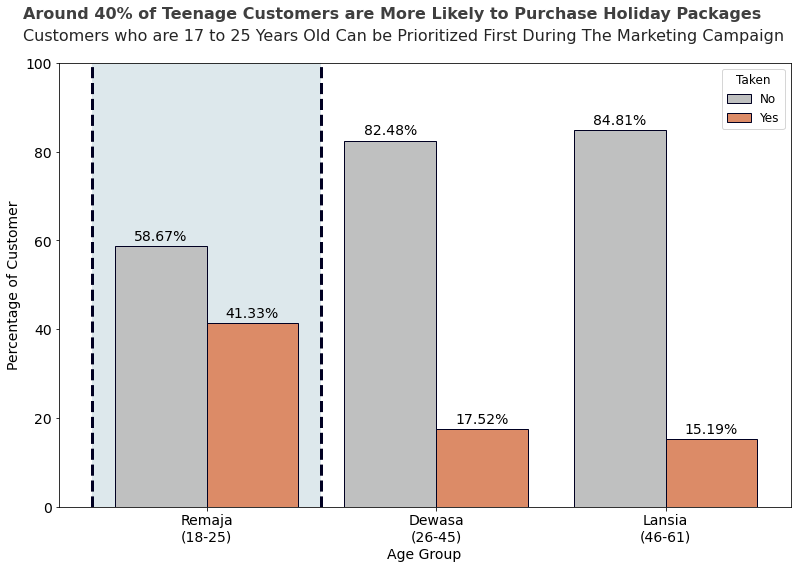

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(data=df_product_age, x='AgeGroup', y='Percentage', hue='ProdTaken',
                 order=['Remaja', 'Dewasa', 'Lansia'], palette=['#BFC0C0', '#EF8354'], edgecolor='#000022')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Percentage of Customer', fontsize=14)

age_labs = []
for x in ['Remaja', 'Dewasa', 'Lansia']:
    minimum = int(df_final_all[df_final_all['AgeGroup']==x]['Age'].min())
    maksimum = int(df_final_all[df_final_all['AgeGroup']==x]['Age'].max())
    age_labs.append('('+str(minimum)+'-'+str(maksimum)+')')
ax.set_xticklabels([x.get_text()+'\n'+lab for x, lab in zip(ax.get_xticklabels(), age_labs)])
ax.set_ylim(0, 100)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', size=14, padding=3)

plt.stackplot(np.arange(-0.5, 1.5 ,1), [[100]], colors='#568EA3', alpha=0.2)
plt.axvline(x=-0.5, color='#000022', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#000022', linestyle='--', linewidth=3) 

ax.text(s='Around 40% of Teenage Customers are More Likely to Purchase Holiday Packages', 
        x=-0.8, y=110, fontsize=16, fontweight='bold', alpha =.75)
ax.text(s='Customers who are 17 to 25 Years Old Can be Prioritized First During The Marketing Campaign',
        x=-0.8, y=105, fontsize=16, alpha =.85)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=12, title_fontsize=12, title='Taken')
plt.tight_layout()
plt.savefig('fig/01.png')
plt.show()

## Product manakah yang lebih banyak dibeli atau ditawarkan kepada masing-masing kelompok umur?

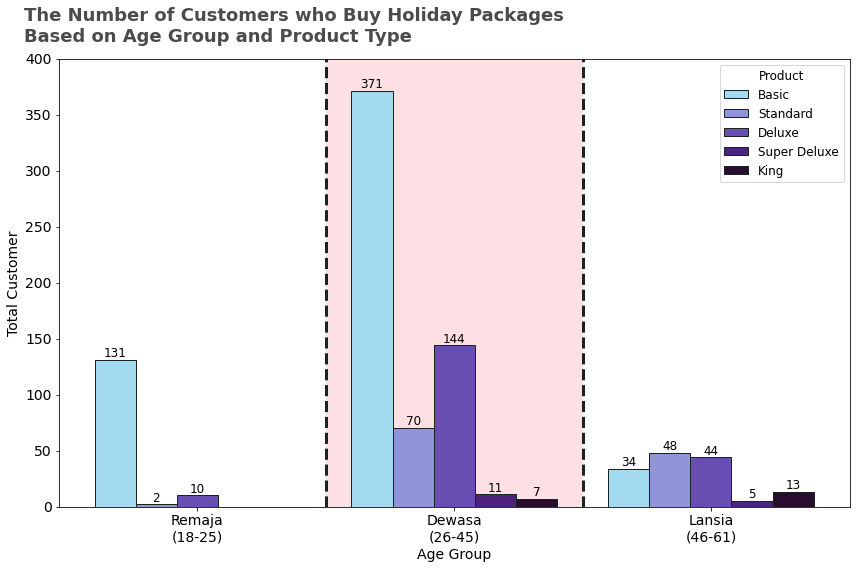

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
product_palettes = ['#97DFFC', '#858AE3', '#613DC1', '#4E148C', '#2C0735']
ax = sns.countplot(data=df_final_all[df_final_all['ProdTaken']==1], x='AgeGroup', hue='ProductPitched',
                   order=['Remaja', 'Dewasa', 'Lansia'], hue_order=product_labs,
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)

age_labs = []
for x in ['Remaja', 'Dewasa', 'Lansia']:
    minimum = int(df_final_all[df_final_all['AgeGroup']==x]['Age'].min())
    maksimum = int(df_final_all[df_final_all['AgeGroup']==x]['Age'].max())
    age_labs.append('('+str(minimum)+'-'+str(maksimum)+')')
ax.set_xticklabels([x.get_text()+'\n'+lab for x, lab in zip(ax.get_xticklabels(), age_labs)])
ax.set_ylim(0, 400)
   
plt.stackplot(np.arange(0.5, 2., 1), [[400]], colors='#F56476', alpha=0.2)
plt.axvline(x=0.5, color='#162521', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, size=12)
ax.legend(fontsize=12, title_fontsize=12, title='Product')
ax.text(s='The Number of Customers who Buy Holiday Packages\nBased on Age Group and Product Type', 
        x=-0.675, y=415, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.savefig('fig/02.png')
plt.show()

## Bagaimanakah durasi pitching dari masing-masing kelompok umur?

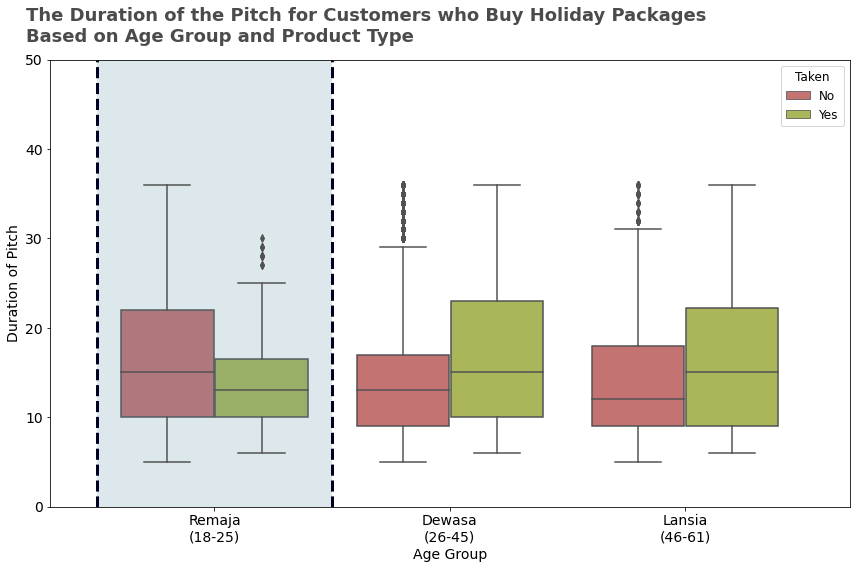

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.boxplot(data=df_final_all, x='AgeGroup', y='DurationOfPitch', hue='ProdTaken',
                 order=['Remaja', 'Dewasa', 'Lansia'], palette=['#D16666', '#B6C649'])

ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Duration of Pitch', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

age_labs = []
for x in ['Remaja', 'Dewasa', 'Lansia']:
    minimum = int(df_final_all[df_final_all['AgeGroup']==x]['Age'].min())
    maksimum = int(df_final_all[df_final_all['AgeGroup']==x]['Age'].max())
    age_labs.append('('+str(minimum)+'-'+str(maksimum)+')')
ax.set_xticklabels([x.get_text()+'\n'+lab for x, lab in zip(ax.get_xticklabels(), age_labs)])
ax.set_ylim(0, 50)

plt.stackplot(np.arange(-0.5, 1.5 ,1), [[50]], colors='#568EA3', alpha=0.2)
plt.axvline(x=-0.5, color='#000022', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#000022', linestyle='--', linewidth=3) 

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'],
          fontsize=12, title_fontsize=12, title='Taken')

ax.text(s='The Duration of the Pitch for Customers who Buy Holiday Packages\nBased on Age Group and Product Type', 
        x=-0.8, y=52, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.savefig('fig/03.png')
plt.show()

## Apakah pelanggan ditawarkan produk berdasarkan jabatan tertentu?

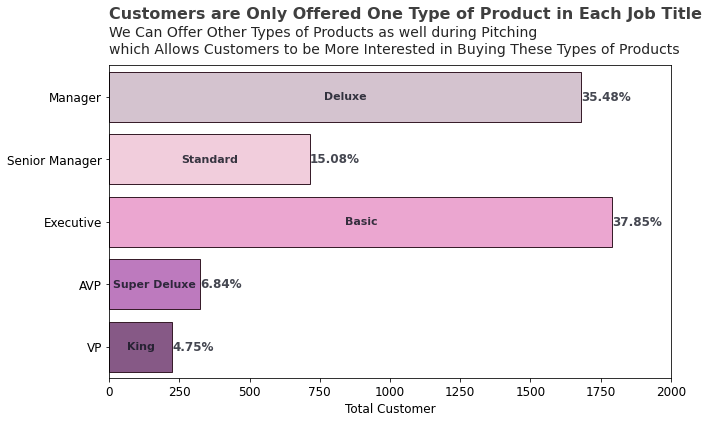

In [144]:
job_level = ['Manager', 'Senior Manager', 'Executive', 'AVP','VP']
job_colors = ['#D7C0D0', '#F7C7DB', '#F79AD3', '#C86FC9', '#8E518D']
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(data=df_final_all, y='Designation', order=job_level, palette=job_colors, edgecolor='#381D2A', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(0, 2000)
plt.xlabel('Total Customer', fontsize=12)
plt.ylabel('')

job_bars = ['Deluxe', 'Standard', 'Basic', 'Super Deluxe', 'King']
job_data = (df_final_all['Designation'].value_counts(normalize=True)*100).reindex(job_level).values.tolist()
for rec, job in zip(ax.patches, job_data) :
    ax.text(rec.get_x() + rec.get_width() + 1,
            rec.get_y() + rec.get_height() / 2,
            '{:.2f}%'.format(job), fontsize=12, fontweight='bold',
            color='#161925', alpha=0.8, va='center', ha='left')
for rec, job in zip(ax.patches, job_bars) :
    ax.text(rec.get_x() + rec.get_width() / 2,
            rec.get_y() + rec.get_height() / 2,
            job, fontsize=11, fontweight='bold',
            color='#161925', alpha=0.85, va='center', ha='center')

ax.text(s='Customers are Only Offered One Type of Product in Each Job Title', 
        x=-1.05, y=-1.25, fontsize=16, fontweight='bold', alpha =.75)
ax.text(s='We Can Offer Other Types of Products as well during Pitching\nwhich Allows Customers to be More Interested in Buying These Types of Products',
        x=-1.05, y=-0.7, fontsize=14, alpha =.85)
plt.tight_layout()
plt.savefig('fig/04.png')
plt.show()

## Apakah pendapatan bulanan customer mempengaruhi jenis penawaran produk selama pitching?

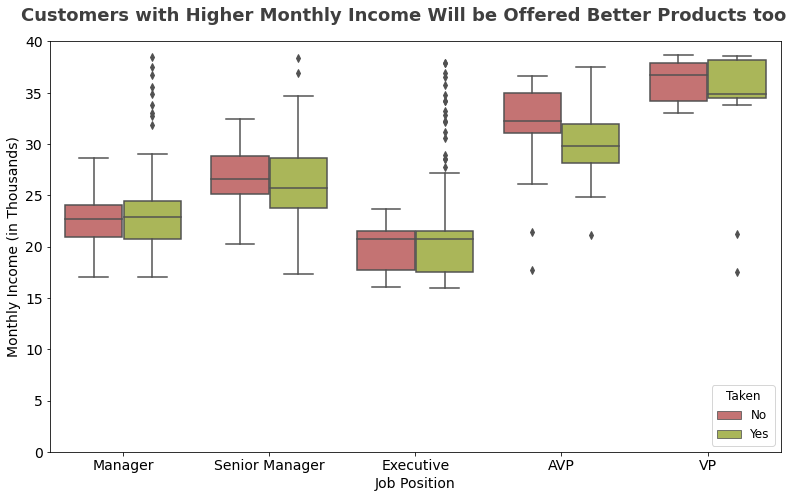

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.boxplot(data=df_final_all, x='Designation', y='MonthlyIncome', hue='ProdTaken',
            palette=['#D16666', '#B6C649'], order=job_level, ax=ax)

ax.tick_params(axis='both', which='major', labelsize=14)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%1.0f' % (x*1e-3)))

ax.set_xlabel('Job Position', fontsize=14)
ax.set_ylabel('Monthly Income (in Thousands)', fontsize=14)
ax.set_ylim(0, 40000)

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], loc='lower right',
          fontsize=12, title_fontsize=12, title='Taken')

ax.text(s='Customers with Higher Monthly Income Will be Offered Better Products too', 
        x=-0.7, y=42000, fontsize=18, fontweight='bold', alpha =.75)
plt.tight_layout()
plt.savefig('fig/05.png')
plt.show()

## Apakah produk yang dibeli atau ditawarkan berdasarkan kepemilikan passport?

In [109]:
df_product_taken = df_final_all[df_final_all['ProdTaken']==1]
df_product_passport = pd.crosstab(df_product_taken['ProductPitched'], df_product_taken['Passport'], normalize='index')*100
df_product_passport = df_product_passport.stack().reset_index(name='Percentage')
df_product_passport

,ProductPitched,Passport,Percentage
0,Basic,0,42.164179
1,Basic,1,57.835821
2,Deluxe,0,49.494949
3,Deluxe,1,50.505051
4,King,0,40.000000
5,King,1,60.000000
6,Standard,0,63.333333
7,Standard,1,36.666667
8,Super Deluxe,0,37.500000
9,Super Deluxe,1,62.500000


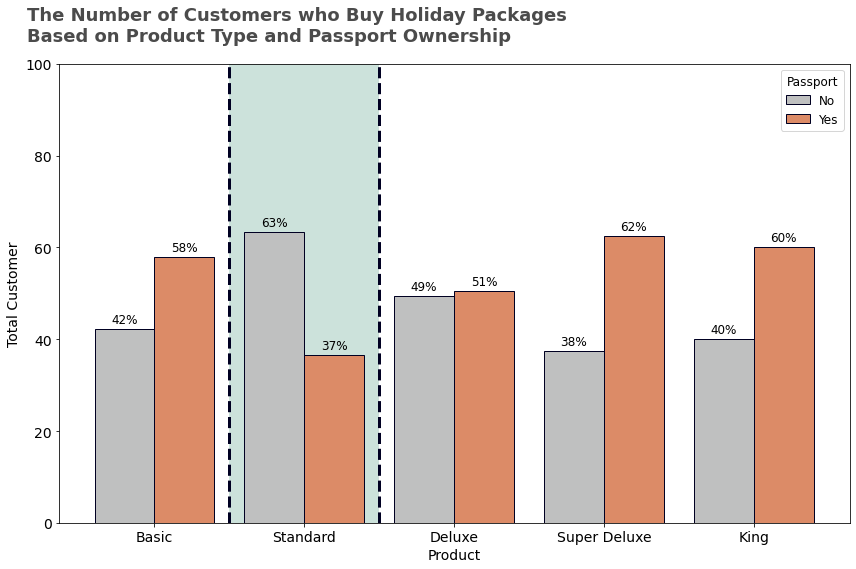

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
ax = sns.barplot(data=df_product_passport, x='ProductPitched', y='Percentage', hue='Passport',
              order=product_labs, palette=['#BFC0C0', '#EF8354'], edgecolor='#000022')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Product', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 100)
   
plt.stackplot(np.arange(0.5, 2., 1), [[100]], colors='#04724D', alpha=0.2)
plt.axvline(x=0.5, color='#000022', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='#000022', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', size=12, padding=3)

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=12, title_fontsize=12, title='Passport')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on Product Type and Passport Ownership", 
        x=-0.85, y=105, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.savefig('fig/06.png')
plt.show()

## Apakah status pernikahan mempengaruhi pelanggan untuk membeli paket liburan?

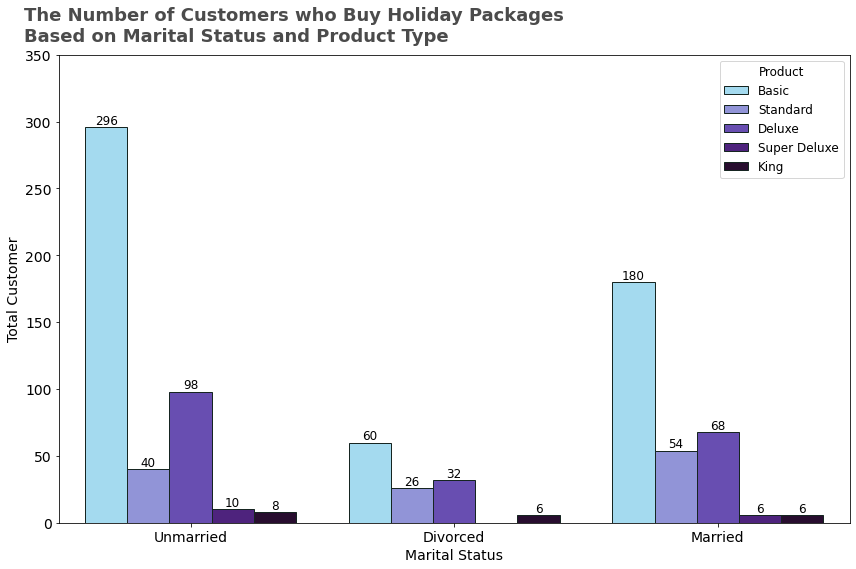

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
product_palettes = ['#97DFFC', '#858AE3', '#613DC1', '#4E148C', '#2C0735']
ax = sns.countplot(data=df_final_all[df_final_all['ProdTaken']==1], x='MaritalStatus', hue='ProductPitched',
                   order=['Unmarried', 'Divorced', 'Married'], hue_order=product_labs,
                   palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Marital Status', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 350)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[400]], colors='#F56476', alpha=0.2)
# plt.axvline(x=0.5, color='#162521', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, size=12)
ax.legend(fontsize=12, title_fontsize=12, title='Product')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on Marital Status and Product Type", 
        x=-0.63, y=360, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.savefig('fig/07.png')
plt.show()

## Product manakah yang lebih suka dibeli pelanggan berdasarkan kota tinggalnya?

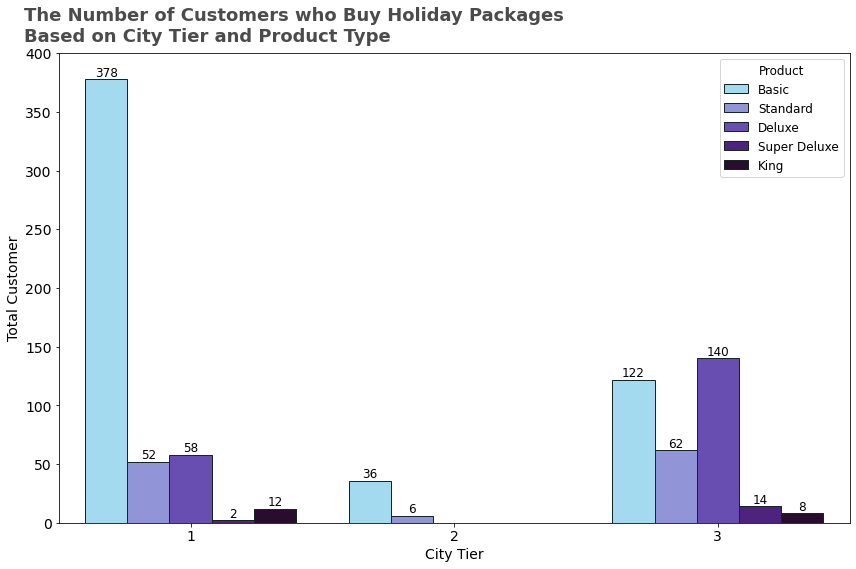

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
product_labs = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
product_palettes = ['#97DFFC', '#858AE3', '#613DC1', '#4E148C', '#2C0735']
ax = sns.countplot(data=df_final_all[df_final_all['ProdTaken']==1], x='CityTier', hue='ProductPitched',
                   hue_order=product_labs, palette=product_palettes, edgecolor='#162521')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('City Tier', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
ax.set_ylim(0, 400)
   
# plt.stackplot(np.arange(0.5, 2., 1), [[400]], colors='#F56476', alpha=0.2)
# plt.axvline(x=0.5, color='#162521', linestyle='--', linewidth=3)
# plt.axvline(x=1.5, color='#162521', linestyle='--', linewidth=3) 

for container in ax.containers:
    ax.bar_label(container, size=12)
ax.legend(fontsize=12, title_fontsize=12, title='Product')
ax.text(s="The Number of Customers who Buy Holiday Packages\nBased on City Tier and Product Type", 
        x=-0.63, y=410, fontsize=18, fontweight='bold', alpha =.7)
plt.tight_layout()
plt.savefig('fig/08.png')
plt.show()

# Business Impact

## Conversion Rate

In [113]:
df_final_test.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,ProdTaken_Pred
9,36.000000,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0,0,0
13,34.000000,Self Enquiry,1,25.0,Small Business,Male,3,3.0,Basic,3.0,Married,1.0,0,3,0,2.0,Executive,17661.0,0,0
18,53.000000,Self Enquiry,3,8.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Divorced,3.0,0,3,1,0.0,AVP,30427.0,0,0
20,37.622265,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,22347.0,0,0
24,34.000000,Self Enquiry,1,12.0,Small Business,Male,2,3.0,Basic,5.0,Unmarried,3.0,0,2,1,1.0,Executive,17960.0,1,1


In [114]:
# count number of total customer
total_customer_before = len(df_final_test['ProdTaken'])
total_customer_after = len(df_final_test[df_final_test['ProdTaken_Pred']==1])

# count number of targeted customer
targeted_customer_before = len(df_final_test[df_final_test['ProdTaken']==1]) 
targeted_customer_after = len(df_final_test[(df_final_test['ProdTaken']==1)
                                            & (df_final_test['ProdTaken_Pred']==1)])

# calculate conversion rate
cvr_before = round(targeted_customer_before/total_customer_before * 100, 1)
cvr_after = round(targeted_customer_after/total_customer_after * 100, 1)

In [115]:
# view conversion rate before and after using model
df_conversion = pd.DataFrame([[total_customer_before, total_customer_after],
                              [targeted_customer_before, targeted_customer_after],
                              [cvr_before, cvr_after]],
                             columns=['Before Using Model', 'After Using Model'],
                             index=['Total Customer', 'Targeted Customer', 'Conversion Rate'])
df_conversion

,Before Using Model,After Using Model
Total Customer,947.0,148.0
Targeted Customer,170.0,131.0
Conversion Rate,18.0,88.5


## Marketing Cost

In [116]:
# define cost in minutes
cost_per_minute = 3

# calculate marketing cost
duration_before = df_final_test['DurationOfPitch'].sum()
duration_after = df_final_test[df_final_test['ProdTaken_Pred']==1]['DurationOfPitch'].sum()
cost_before = duration_before * cost_per_minute
cost_after = duration_after * cost_per_minute
saving_cost = cost_before - cost_after
saving_cost_perc = round(saving_cost/cost_before * 100, 0)

In [117]:
df_cost = pd.DataFrame([[targeted_customer_before, targeted_customer_after], [cost_before, cost_before],
                        [cost_before, cost_after], [0, saving_cost], [0, saving_cost_perc]],
                       index=['Targeted Customer', 'All Cost', 'Spending Cost', 'Saving Cost', '% Saving Cost'],
                       columns=['Before Using Model', 'After Using Model'])
df_cost

,Before Using Model,After Using Model
Targeted Customer,170.0,131.0
All Cost,42342.0,42342.0
Spending Cost,42342.0,7245.0
Saving Cost,0.0,35097.0
% Saving Cost,0.0,83.0


## Revenue

In [118]:
# get price for each product
product = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']

def get_product_price(x):
    if x == 'Basic':
        return 1000
    elif x == 'Standard':
        return 2000
    elif x == 'Deluxe':
        return 3000
    elif x == 'Super Deluxe':
        return 4000
    else:
        return 5000

In [119]:
# get revenue before using model
df_revenue_before = df_final_test[df_final_test['ProdTaken']==1].groupby('ProductPitched')['ProductPitched'].count().reindex(product)
df_revenue_before = df_revenue_before.reset_index(name='Total')
df_revenue_before['Price'] = df_revenue_before['ProductPitched'].apply(lambda x : get_product_price(x))
df_revenue_before['Revenue'] = df_revenue_before['Total'] * df_revenue_before['Price'] * 0.1
df_revenue_before

,ProductPitched,Total,Price,Revenue
0,Basic,101,1000,10100.0
1,Standard,17,2000,3400.0
2,Deluxe,45,3000,13500.0
3,Super Deluxe,2,4000,800.0
4,King,5,5000,2500.0


In [120]:
# get revenue after using model
df_after = df_final_test[(df_final_test['ProdTaken']==1) & (df_final_test['ProdTaken_Pred']==1)]
df_revenue_after = df_after.groupby('ProductPitched')['ProductPitched'].count().reindex(product)
df_revenue_after = df_revenue_after.reset_index(name='Total')
df_revenue_after['Price'] = df_revenue_after['ProductPitched'].apply(lambda x : get_product_price(x))
df_revenue_after['Revenue'] = df_revenue_after['Total'] * df_revenue_after['Price'] * 0.1
df_revenue_after

,ProductPitched,Total,Price,Revenue
0,Basic,77,1000,7700.0
1,Standard,14,2000,2800.0
2,Deluxe,34,3000,10200.0
3,Super Deluxe,2,4000,800.0
4,King,4,5000,2000.0


In [121]:
# view percentage of spending cost from revenue income
spending_perc_before = round(cost_before / df_revenue_before['Revenue'].sum() * 100, 1)
spending_perc_after = round(cost_after / df_revenue_after['Revenue'].sum() * 100, 1)
df_revenue = pd.DataFrame([[targeted_customer_before, targeted_customer_after], [cost_before, cost_after],
                           [df_revenue_before['Revenue'].sum(), df_revenue_after['Revenue'].sum()],
                           [spending_perc_before, spending_perc_after]], 
                          index=['Targeted Customer', 'Spending Cost', 'Revenue', '% Cost from Revenue'],
                          columns=['Before Using Model', 'After Using Model'])
df_revenue

,Before Using Model,After Using Model
Targeted Customer,170.0,131.0
Spending Cost,42342.0,7245.0
Revenue,30300.0,23500.0
% Cost from Revenue,139.7,30.8


# Recommendation

## Gain and Lift Analysis

In [122]:
df_estimate = pd.DataFrame({'ProdTaken_Proba':best_model.predict_proba(X_test2)[:,1], 'ProdTaken': y_test2})
df_estimate = df_estimate.sort_values(by='ProdTaken_Proba', ascending=False)
df_estimate['Decile'] = pd.qcut(df_estimate['ProdTaken_Proba'], 10, labels=[i for i in range (10, 0, -1)])
df_estimate.head()

,ProdTaken_Proba,ProdTaken,Decile
709,0.998896,1,1
3355,0.998894,1,1
3127,0.998200,1,1
1060,0.997921,1,1
2801,0.997832,1,1


In [123]:
# Calculate the actual product taken in each decile
df_prodtaken = pd.crosstab(df_estimate['Decile'], df_estimate['ProdTaken'])[1].reset_index(name='Number of Responses')
df_prodtaken['Number of Cases'] = df_estimate['Decile'].value_counts(sort=False).values
df_prodtaken = df_prodtaken.sort_values(by='Decile', ascending=False).reset_index(drop=True)

# Calculate the cumulative
df_prodtaken['Cumulative Responses'] = df_prodtaken['Number of Responses'].cumsum()
# Calculate the percentage of positive in each decile compared to the total responses
df_prodtaken['% of Events'] = round((df_prodtaken['Number of Responses']/df_prodtaken['Number of Responses'].sum()*100),2)
# Calculate the Gain in each decile
df_prodtaken['Gain'] = df_prodtaken['% of Events'].cumsum()
# Calculate lift for each decile
df_prodtaken['Decile'] = df_prodtaken['Decile'].astype('int')
df_prodtaken['Lift'] = round(df_prodtaken['Gain']/(df_prodtaken['Decile']*10), 2)
df_prodtaken

,Decile,Number of Responses,Number of Cases,Cumulative Responses,% of Events,Gain,Lift
0,1,88,95,88,51.76,51.76,5.18
1,2,63,95,151,37.06,88.82,4.44
2,3,13,94,164,7.65,96.47,3.22
3,4,3,95,167,1.76,98.23,2.46
4,5,0,94,167,0.00,98.23,1.96
5,6,0,95,167,0.00,98.23,1.64
6,7,2,95,169,1.18,99.41,1.42
7,8,1,94,170,0.59,100.00,1.25
8,9,0,95,170,0.00,100.00,1.11
9,10,0,95,170,0.00,100.00,1.00


## Shap Values

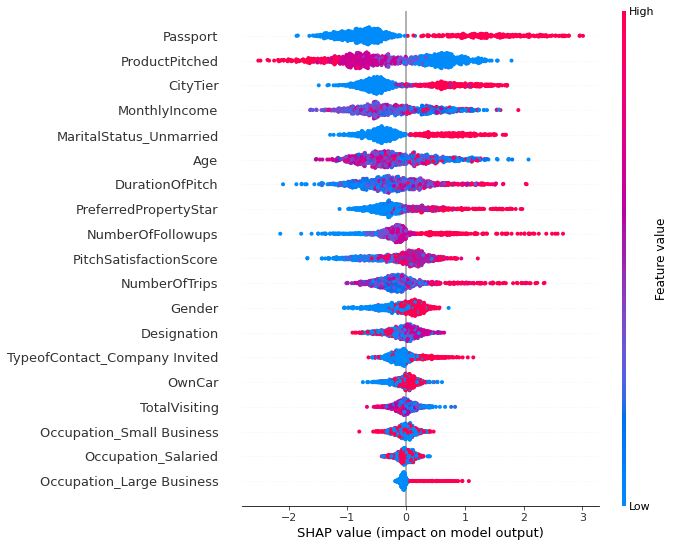

In [124]:
import shap
from xgboost import DMatrix
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(DMatrix(X_test2, label=y_test2))
shap.summary_plot(shap_values, X_test2)

In [125]:
# check force plot using first rows
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test2.iloc[0,:])

In [126]:
df_shap = df_pred_test.copy()
df_shap.reset_index(drop=True, inplace=True)
false_idx = df_shap[(df_shap['ProdTaken']==1)&(df_shap['ProdTaken_Pred']==0)].index.tolist()
true_idx = df_shap[df_shap['ProdTaken_Pred']==1].index.tolist()

In [127]:
# predict positive class
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[true_idx,:], X_test2.iloc[true_idx,:])

In [128]:
# predict negative class
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[false_idx,:], X_test2.iloc[false_idx,:])

# Conclusion

Berdasarkan hasil prediksi dan analisis yang telah kami lakukan maka dapat disimpulkan bahwa:
1. **Model yang dihasilkan memiliki F1 Score 82.39%** artinya dapat memprediksi pelanggan yang akan membeli paket liburan (Precision) 88.51% dengan ketepatan memprediksi pelanggan benar akan membeli paket liburan (Recall) 77.06% menghasilkan **conversion rate 88.5%**.
2. **Marketing Cost** yang dapat dikeluarkan jika menggunakan model sekitar **$7245** atau berhasil mengurangi pengeluaran sekitar **83% (\$35097)**. Selain itu **Revenue** yang akan didapatkan perusahaan jika menggunakan model sekitar **\$70500** dimana hasil ini memang lebih kecil tanpa menggunakan model tetapi pengeluaran biaya yang dihasilkan hanya **10% dari revenue yang akan dihasilkan**.